# Module 2 Code

This is main code for Module 2

Please run the code line by line

## Contribution

Main code created, edited, maintained and responsibled by ENZE WANG

Fix by HanGyu KANG, CHENYANG JIANG and RUI HUANG

HanGyu KANG edited the variables selection with tree regression.

CHENYANG JIANG edited BOXCOX and debug the whole code.

RUI HUANG edited the model selection part. 


## Table of Contents:

1. Clean Part

2. Model Build

3. Model Diagnosis


We require the following packages, if there is problem to install, try install in Rstudio instead of here.

In [1]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(DAAG)){
  install.packages("DAAG")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}

Loading required package: ggplot2

Loading required package: DAAG

Loading required package: lattice

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: grid

Loading required package: gridExtra

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DAAG’:

    vif


Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: leaps

Loading required package: caret

Loading required package: psych


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: broom

Loading required package: gbm

Loaded gbm 2.1.8

Loading required package: randomForest

randomFor

Please put the Module_2.ipynb into the main Folder and run it instead of in Code Folder, or it may not find the BodyFat.csv

## Clean Part

Read the BodyFat.csv

In [2]:
RawData = read.csv("Data/BodyFat.csv",sep=",")
RawDataFrame=data.frame(RawData)

Look what our data looks like, our data contains 252 observations and 17 variables. BODYFAT is variable we want to build model for. Variables from AGE and WRIST are predictors. Here you can see range, mean, sd, median and other information here. In our dataset, WEIGHT, HEIGHT and ADIPOSITY are in English unit and other are in metric unit. But in model we do not want to change the data into the same unit because the coefficient of our model will fix them.

In [3]:
head(RawData)
tail(RawData)
dim(RawData)
colnames(RawData)
summary(RawData)
describe(RawData)

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  
1 1    12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5
2 2     6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7
3 3    24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2
4 4    10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2
5 5    27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9
6 6    20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8
  THIGH KNEE ANKLE BICEPS FOREARM WRIST
1 59.0  37.3 21.9  32.0   27.4    17.1 
2 58.7  37.3 23.4  30.5   28.9    18.2 
3 59.6  38.9 24.0  28.8   25.2    16.6 
4 60.1  37.3 22.8  32.4   29.4    18.2 
5 63.2  42.2 24.0  32.2   27.7    17.7 
6 66.0  42.0 25.6  35.7   30.6    18.8

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  
247 247  29.1    1.0308  69  215.50 70.50  30.5      40.8 113.7 107.6   110.0
248 248  11.5    1.0736  70  134.25 67.00  21.1      34.9  89.2  83.6    88.8
249 249  32.3    1.0236  72  201.00 69.75  29.1      40.9 108.5 105.0   104.5
250 250  28.3    1.0328  72  186.75 66.00  30.2      38.9 111.1 111.5   101.7
251 251  25.3    1.0399  72  190.75 70.50  27.0      38.9 108.3 101.3    97.8
252 252  30.7    1.0271  74  207.50 70.00  29.8      40.8 112.4 108.5   107.1
    THIGH KNEE ANKLE BICEPS FOREARM WRIST
247 63.3  44.0 22.6  37.5   32.6    18.8 
248 49.6  34.8 21.5  25.6   25.7    18.5 
249 59.6  40.8 23.2  35.2   28.6    20.1 
250 60.3  37.3 21.5  31.3   27.2    18.0 
251 56.0  41.6 22.7  30.5   29.4    19.8 
252 59.3  42.2 24.6  33.7   30.0    20.9

[1] 252  17

[1] "IDNO"      "BODYFAT"   "DENSITY"   "AGE"       "WEIGHT"    "HEIGHT"   
 [7] "ADIPOSITY" "NECK"      "CHEST"     "ABDOMEN"   "HIP"       "THIGH"    
[13] "KNEE"      "ANKLE"     "BICEPS"    "FOREARM"   "WRIST"

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

vars n   mean       sd          median   trimmed    mad        
IDNO       1   252 126.500000 72.89032858 126.5000 126.500000 93.40380000
BODYFAT    2   252  18.938492  7.75085566  19.0000  18.841089  8.45082000
DENSITY    3   252   1.055574  0.01903143   1.0549   1.055593  0.02083053
AGE        4   252  44.884921 12.60203972  43.0000  44.435644 11.86080000
WEIGHT     5   252 178.924405 29.38915989 176.5000 177.414109 28.72537500
HEIGHT     6   252  70.148810  3.66285579  70.0000  70.272277  2.96520000
ADIPOSITY  7   252  25.436905  3.64811078  25.0500  25.165842  3.11346000
NECK       8   252  37.992063  2.43091323  38.0000  37.960891  2.37216000
CHEST      9   252 100.824206  8.43047553  99.6500 100.282178  8.37669000
ABDOMEN   10   252  92.555952 10.78307680  90.9500  91.995050 10.89711000
HIP       11   252  99.904762  7.16405767  99.3000  99.491584  5.78214000
THIGH     12   252  59.405952  5.24995203  59.0000  59.168812  4.59606000
KNEE      13   252  38.590476  2.41180459  38.5000  38.499505  2.22390000
ANKLE     14   252  23.102381  1.69489340  22.8000  22.979208  1.33434000
BICEPS    15   252  32.273413  3.02127375  32.0500  32.238119  2.89107000
FOREARM   16   252  28.663889  2.02069117  28.7000  28.676238  2.07564000
WRIST     17   252  18.229762  0.93358493  18.3000  18.208911  0.88956000
          min     max      range    skew        kurtosis   se         
IDNO        1.000 252.0000 251.0000  0.00000000 -1.2142949 4.591659105
BODYFAT     0.000  45.1000  45.1000  0.14253614 -0.3456497 0.488258012
DENSITY     0.995   1.1089   0.1139 -0.01993618 -0.3483957 0.001198868
AGE        22.000  81.0000  59.0000  0.28015478 -0.4522804 0.793853884
WEIGHT    118.500 363.1500 244.6500  1.19095252  5.0773341 1.851343055
HEIGHT     29.500  77.7500  48.2500 -5.32104916 57.8597925 0.230738226
ADIPOSITY  18.100  48.9000  30.8000  1.54315976  6.4806299 0.229809378
NECK       31.100  51.2000  20.1000  0.54605853  2.5975472 0.153133140
CHEST      79.300 136.2000  56.9000  0.67346342  0.9128462 0.531070040
ABDOMEN    69.400 148.1000  78.7000  0.82846313  2.1397006 0.679269990
HIP        85.000 147.7000  62.7000  1.47935152  7.2186313 0.451293213
THIGH      47.200  87.3000  40.1000  0.81145913  2.5451286 0.330715892
KNEE       33.000  49.1000  16.1000  0.51060856  0.9850582 0.151929408
ANKLE      19.100  33.9000  14.8000  2.22835848 11.5694616 0.106768248
BICEPS     24.800  45.0000  20.2000  0.28213982  0.4375019 0.190322357
FOREARM    21.000  34.9000  13.9000 -0.21672858  0.7951997 0.127291579
WRIST      15.800  21.4000   5.6000  0.27827023  0.3375082 0.058810323

The following part will use ggplot to study our data, we highly recommend you to check line by line to plot pictures you want, there are so many plot. 

### Histogram of all variables

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


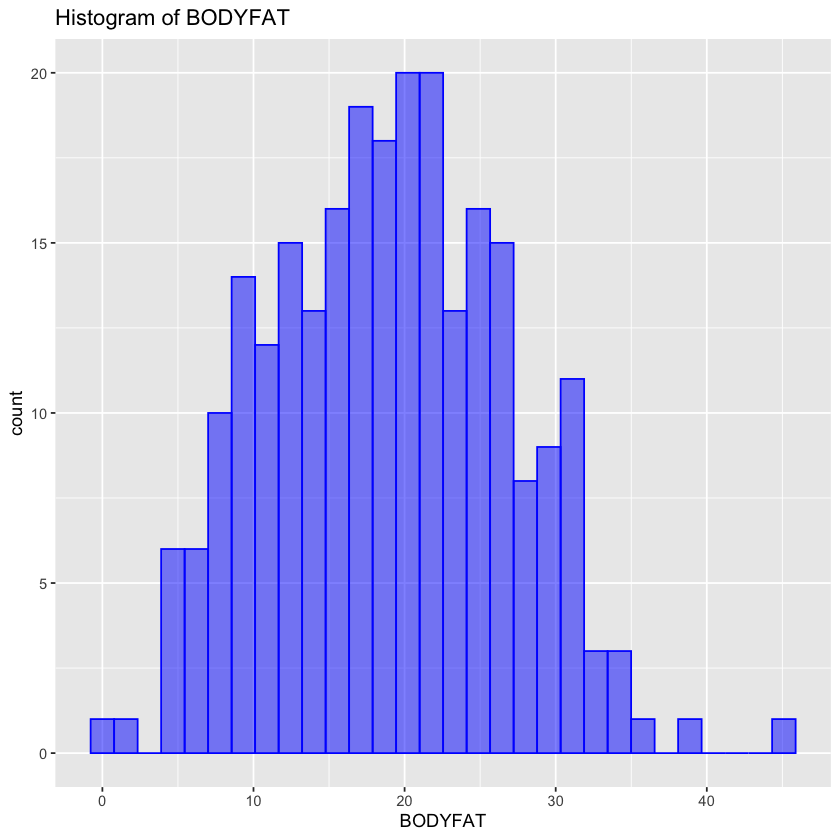

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



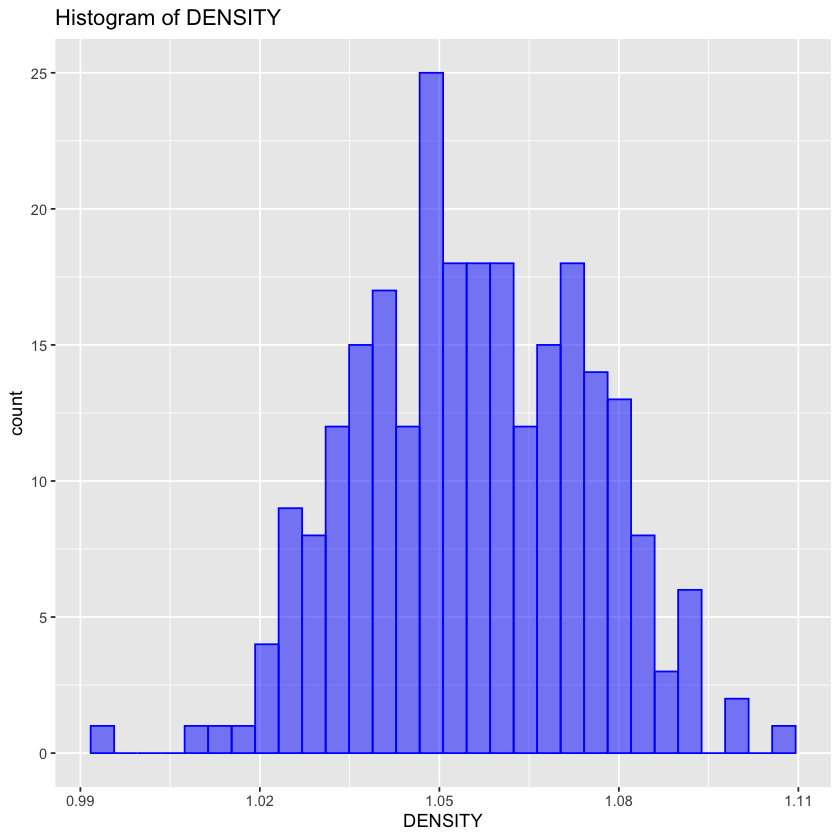

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



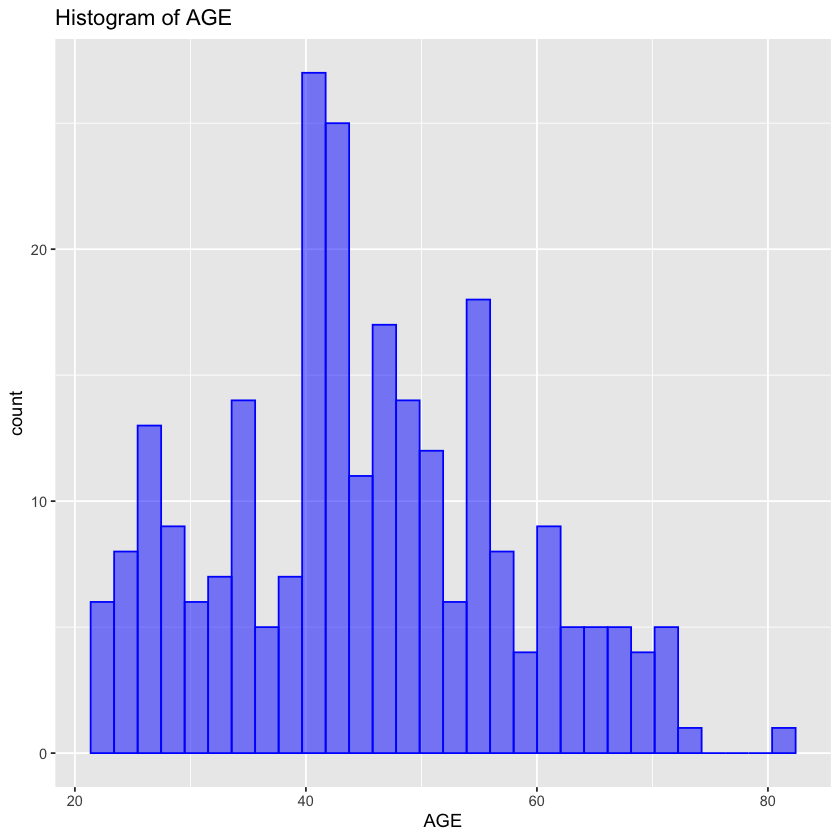

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



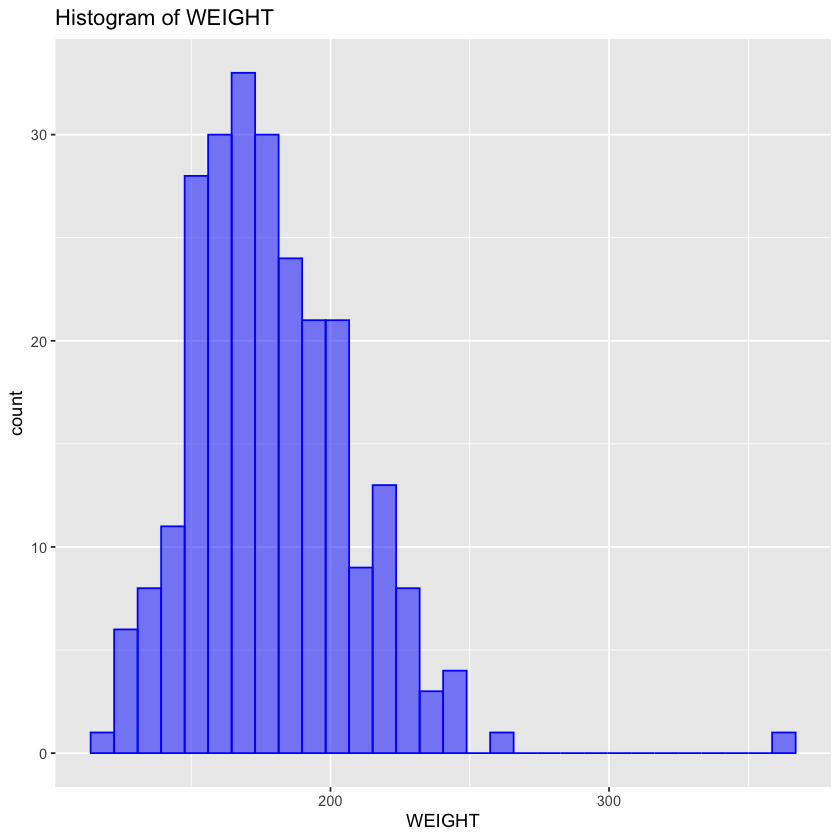

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



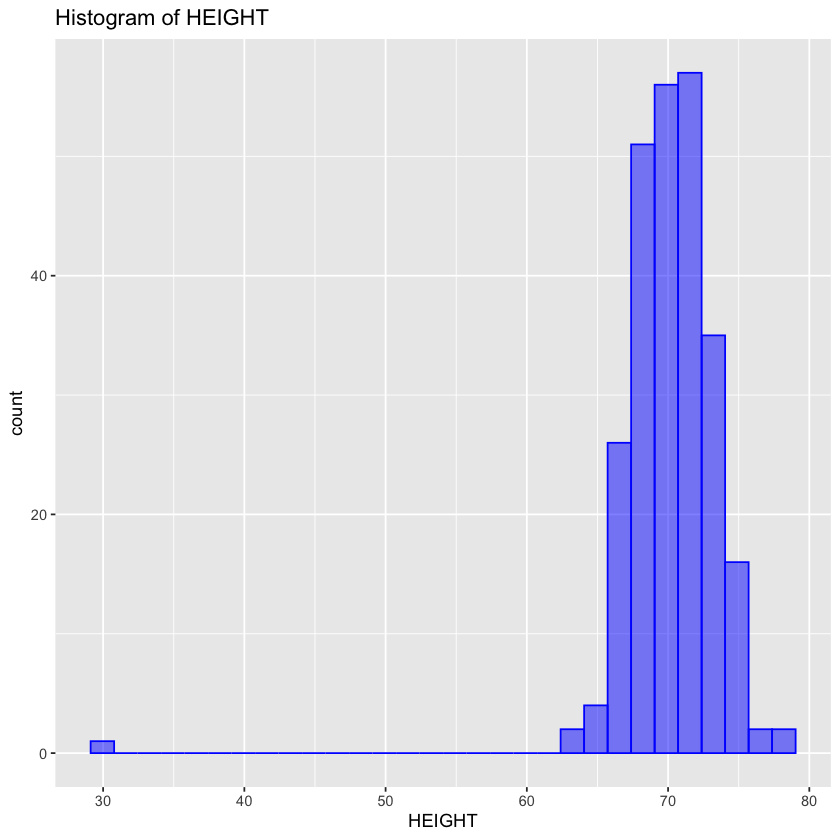

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



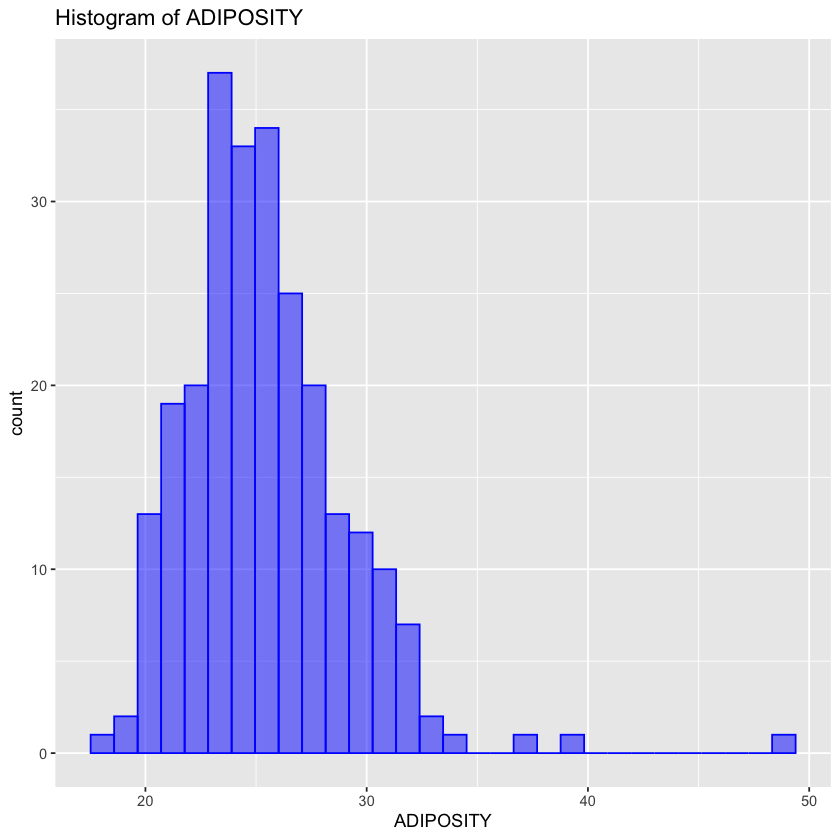

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



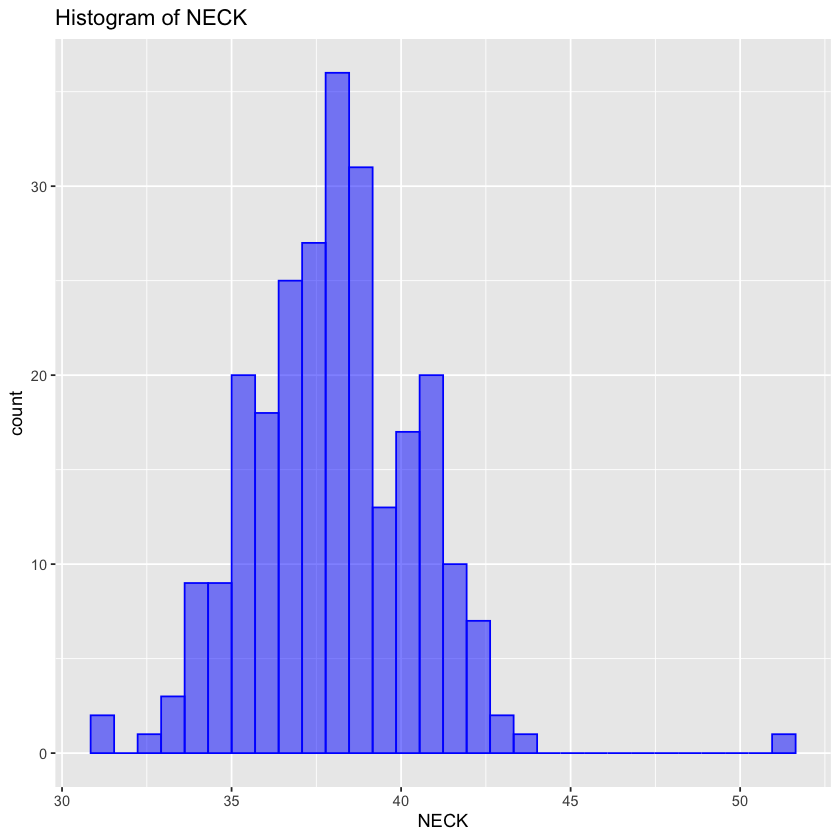

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



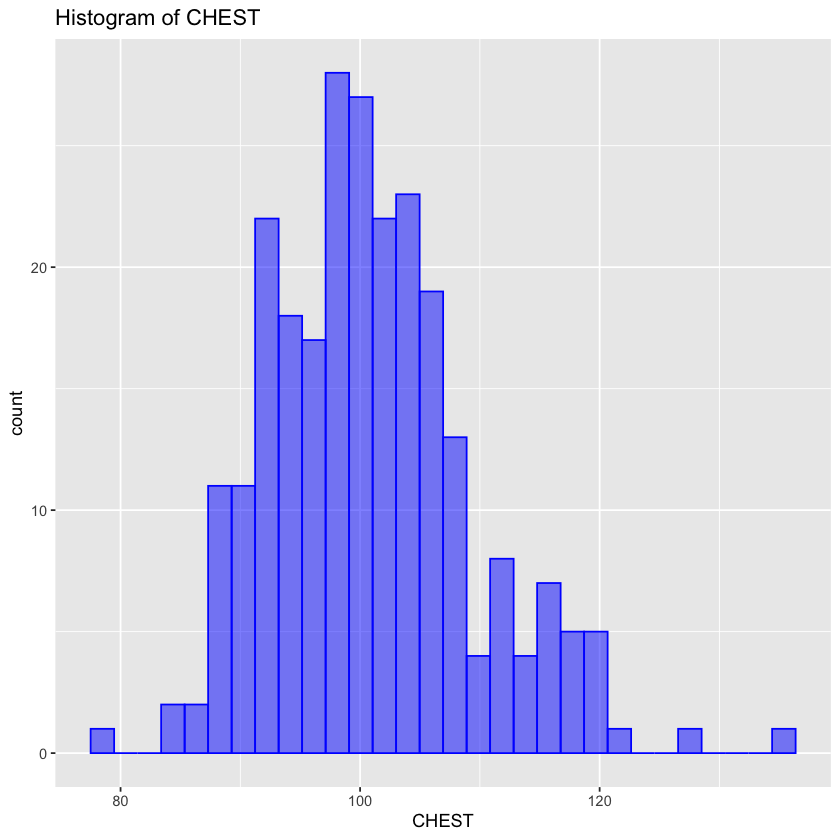

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



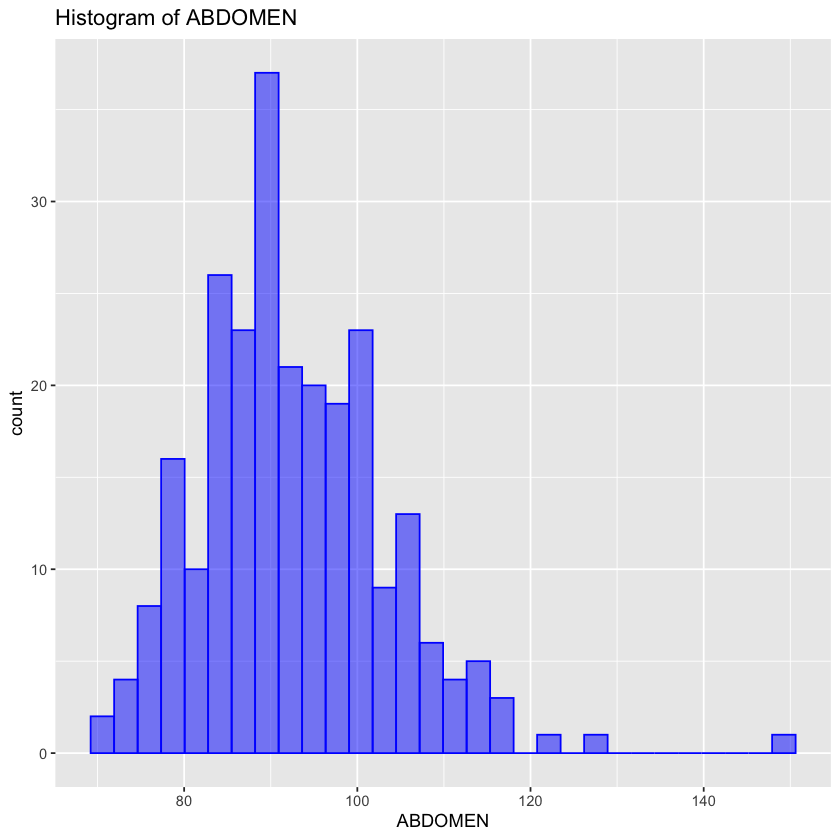

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



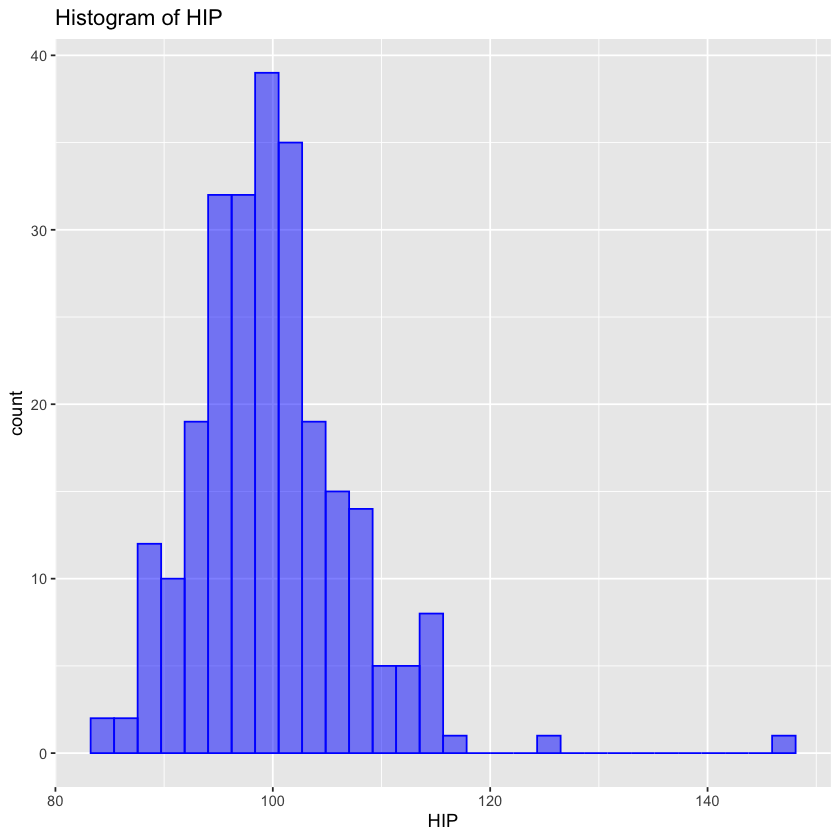

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



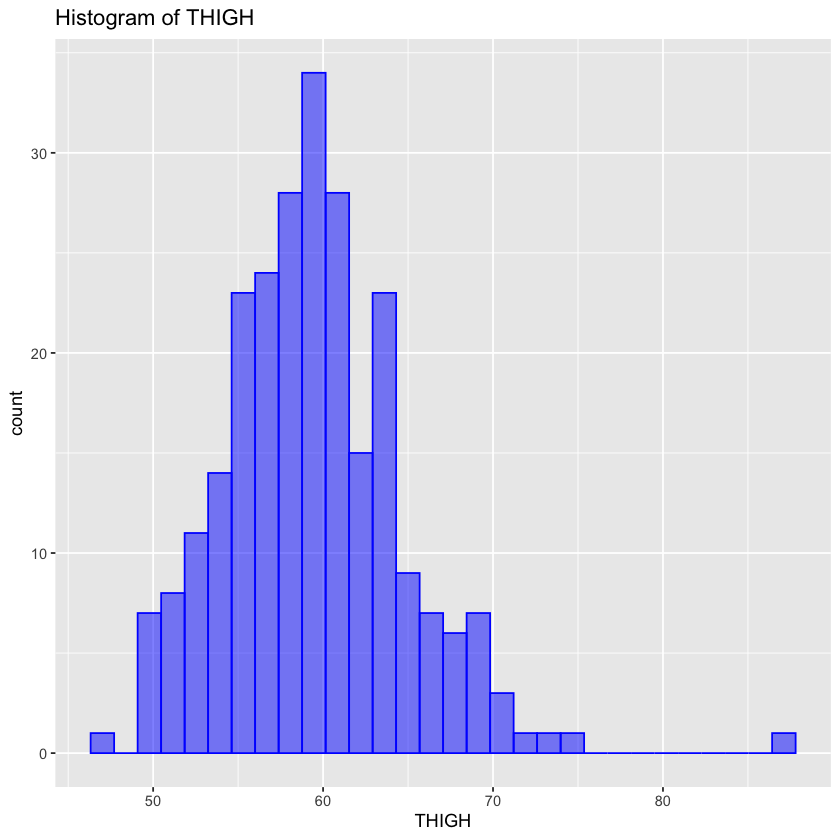

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



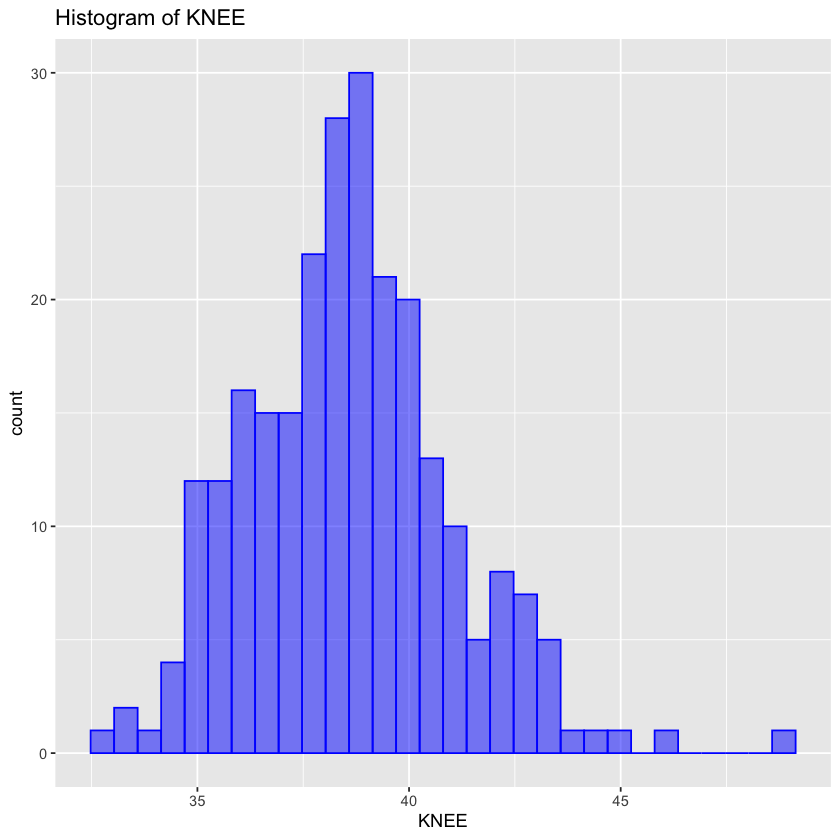

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



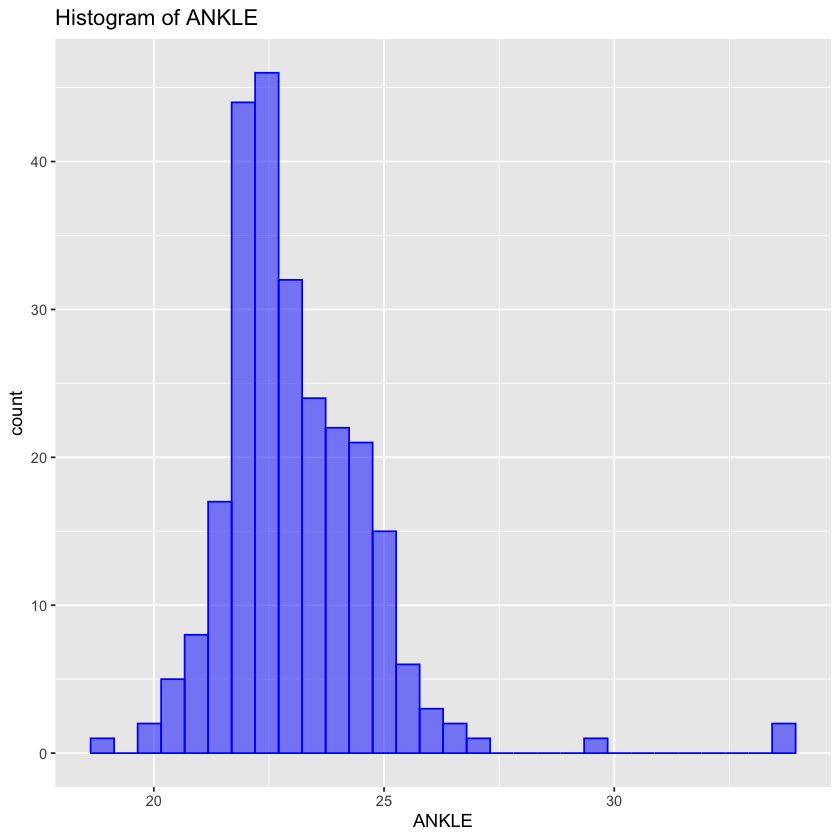

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



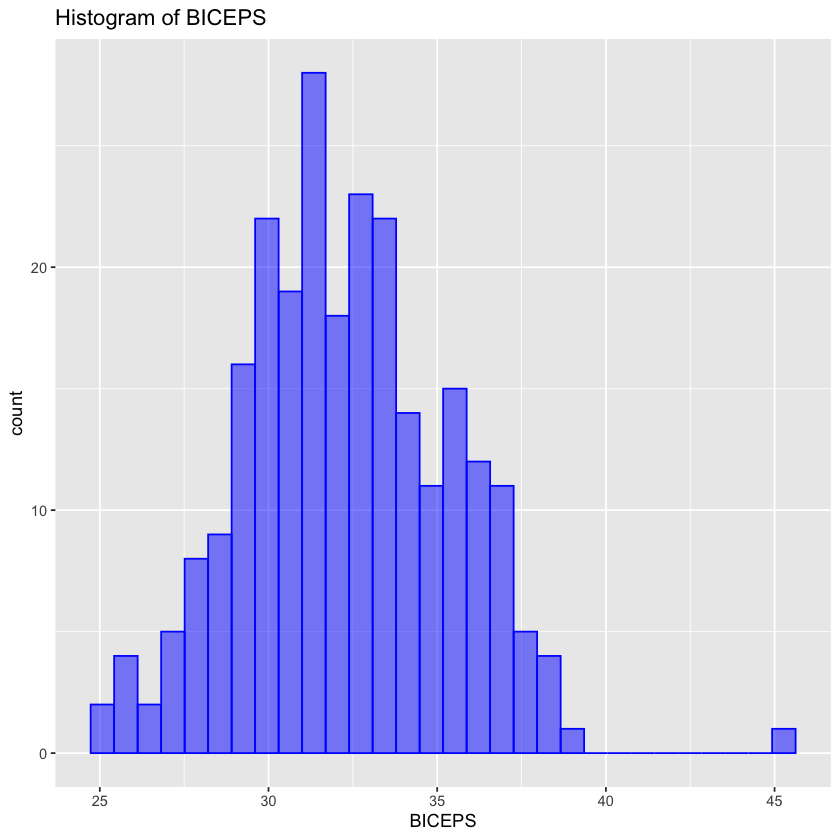

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



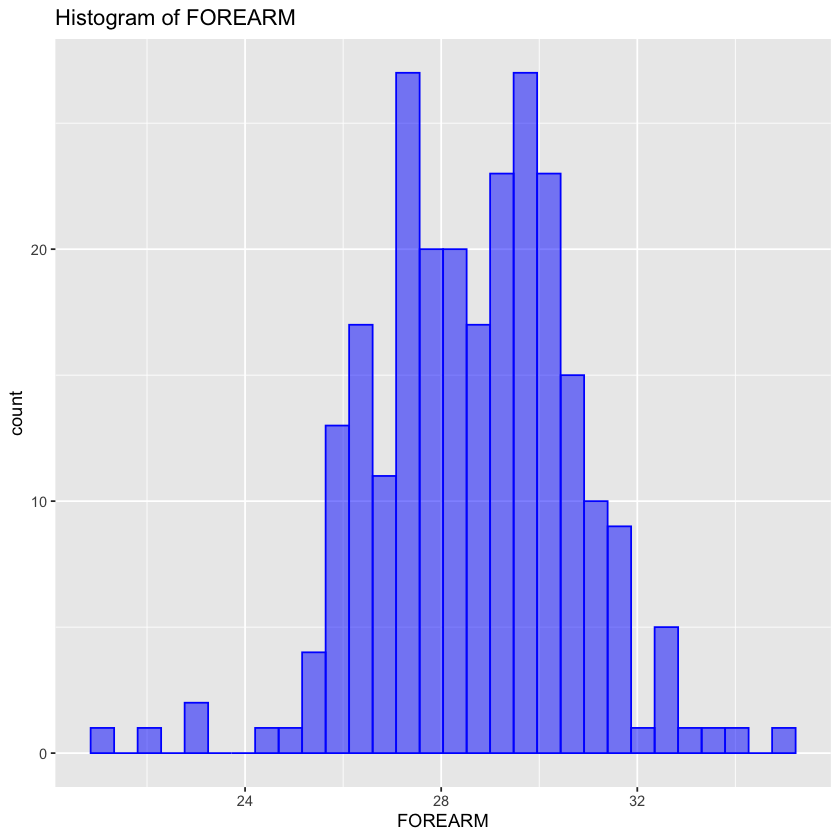

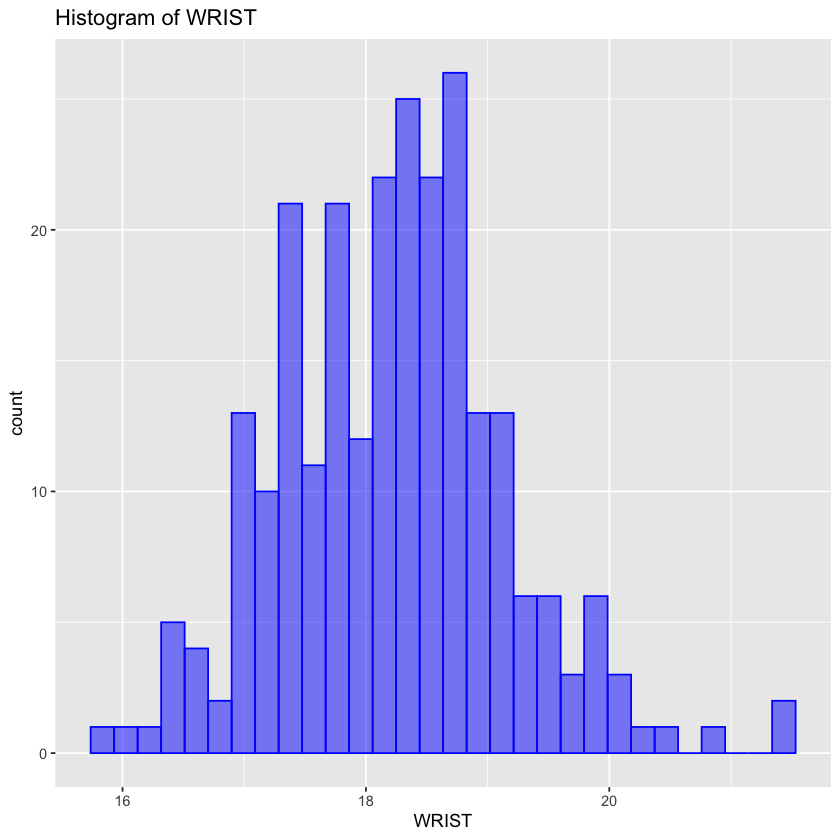

In [4]:
g1=ggplot(RawDataFrame, aes(x=BODYFAT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BODYFAT")
g2=ggplot(RawDataFrame, aes(x=DENSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of DENSITY")
g3=ggplot(RawDataFrame, aes(x=AGE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of AGE")
g4=ggplot(RawDataFrame, aes(x=WEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WEIGHT")
g5=ggplot(RawDataFrame, aes(x=HEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HEIGHT")
g6=ggplot(RawDataFrame, aes(x=ADIPOSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ADIPOSITY")
g7=ggplot(RawDataFrame, aes(x=NECK))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of NECK")
g8=ggplot(RawDataFrame, aes(x=CHEST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of CHEST")
g9=ggplot(RawDataFrame, aes(x=ABDOMEN))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ABDOMEN")
g10=ggplot(RawDataFrame, aes(x=HIP))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HIP")
g11=ggplot(RawDataFrame, aes(x=THIGH))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of THIGH")
g12=ggplot(RawDataFrame, aes(x=KNEE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of KNEE")
g13=ggplot(RawDataFrame, aes(x=ANKLE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ANKLE")
g14=ggplot(RawDataFrame, aes(x=BICEPS))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BICEPS")
g15=ggplot(RawDataFrame, aes(x=FOREARM))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of FOREARM")
g16=ggplot(RawDataFrame, aes(x=WRIST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WRIST")

ggsave("Image/BODYFAT_His.jpeg",g1)
ggsave("Image/DENSITY_His.jpeg",g2)
ggsave("Image/AGE_His.jpeg",g3)
ggsave("Image/WEIGHT_His.jpeg",g4)
ggsave("Image/HEIGHT_His.jpeg",g5)
ggsave("Image/ADIPOSITY_His.jpeg",g6)
ggsave("Image/NECK_His.jpeg",g7)
ggsave("Image/CHEST_His.jpeg",g8)
ggsave("Image/ABDOMEN_His.jpeg",g9)
ggsave("Image/HIP_His.jpeg",g10)
ggsave("Image/THIGH_His.jpeg",g11)
ggsave("Image/KNEE_His.jpeg",g12)
ggsave("Image/ANKLE_His.jpeg",g13)
ggsave("Image/BICEPS_His.jpeg",g14)
ggsave("Image/FOREARM_His.jpeg",g15)
ggsave("Image/WRIST_His.jpeg",g16)
g1
g2
g3
g4
g5
g6
g7
g8
g9
g10
g11
g12
g13
g14
g15
g16

From histogram plot you can see the distribution of every variable. There is some extreme values such as 0 in BODYFAT, extreme low DENSITY, we will try remove or fix them in the following steps. 

From histograms we also can see that:

1. Most of BODYFAT fall from 5% to 30%, with some outliers such as very high and low BODYFAT

2. Our observations' age is larger than 20, and a lot of them are in middle age, there is less observation whose age is larger than 60, and there is a very old man.

3. There is no obvious outliers in weight except a very fat man. 

4. There is no obvious outliers but we have some very low height man in HEIGHT. 

5. Some outstanding large values outliers in ADIPOSITY.

6. Some outstanding large values outliers in NECK.

7. Some outstanding large and small values outliers in CHEST.

8. Some obvious large value outliers in ABDOMEN, ANKLE, HIP, THIGH, BICEPS, WRIST and KNEE. 

10. FOREARM has some small value outliers. 

11. Most of variables is unimodal, just like what BODYFAT is, except AGE.

12. There are some extreme high values in almost all variables, but there is few of extreme low values. So it seems that obesity is more common than thin people in our dataset. 

### Boxplot of all variables

From boxplot we can detect several outliers, we will find them in dataset and study them. The boxplot contains two lines which are upper and lower quartiles. Points which are out of the range of upper and lower quartiles will be regarded as our outliers. But we will also examine them without boxplot. 

Saving 7 x 7 in image



TableGrob (4 x 4) "arrange": 16 grobs
    z     cells    name           grob
1   1 (1-1,1-1) arrange gtable[layout]
2   2 (1-1,2-2) arrange gtable[layout]
3   3 (1-1,3-3) arrange gtable[layout]
4   4 (1-1,4-4) arrange gtable[layout]
5   5 (2-2,1-1) arrange gtable[layout]
6   6 (2-2,2-2) arrange gtable[layout]
7   7 (2-2,3-3) arrange gtable[layout]
8   8 (2-2,4-4) arrange gtable[layout]
9   9 (3-3,1-1) arrange gtable[layout]
10 10 (3-3,2-2) arrange gtable[layout]
11 11 (3-3,3-3) arrange gtable[layout]
12 12 (3-3,4-4) arrange gtable[layout]
13 13 (4-4,1-1) arrange gtable[layout]
14 14 (4-4,2-2) arrange gtable[layout]
15 15 (4-4,3-3) arrange gtable[layout]
16 16 (4-4,4-4) arrange gtable[layout]

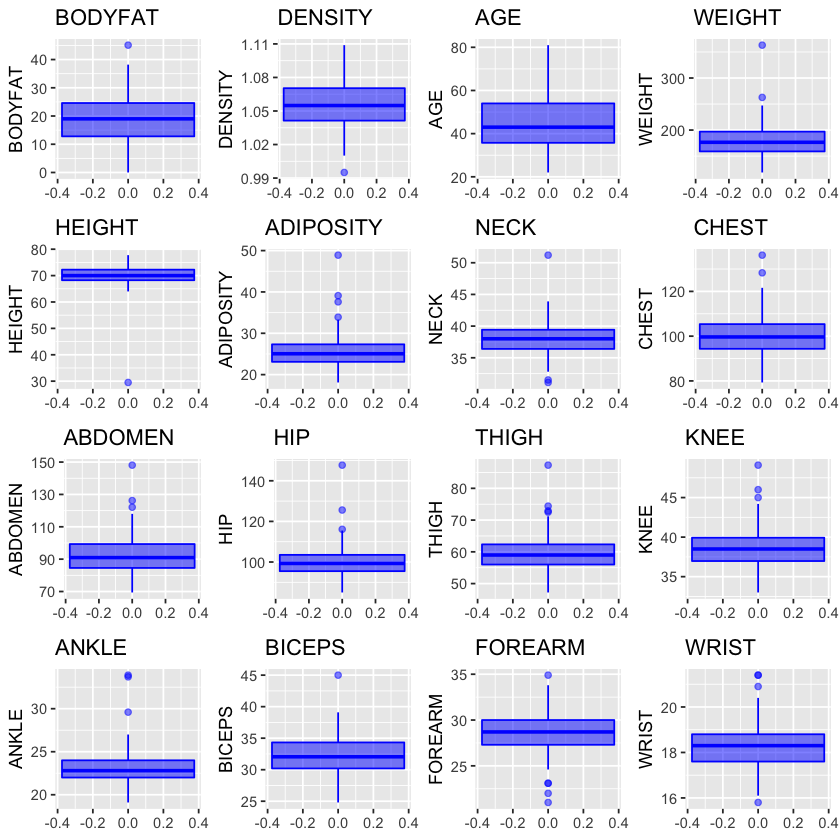

In [86]:
g1=ggplot(RawDataFrame,aes(x=BODYFAT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BODYFAT")
g2=ggplot(RawDataFrame,aes(x=DENSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("DENSITY")
g3=ggplot(RawDataFrame,aes(x=AGE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("AGE")
g4=ggplot(RawDataFrame,aes(x=WEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WEIGHT")
g5=ggplot(RawDataFrame,aes(x=HEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HEIGHT")
g6=ggplot(RawDataFrame,aes(x=ADIPOSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ADIPOSITY")
g7=ggplot(RawDataFrame,aes(x=NECK))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("NECK")
g8=ggplot(RawDataFrame,aes(x=CHEST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("CHEST")
g9=ggplot(RawDataFrame,aes(x=ABDOMEN))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ABDOMEN")
g10=ggplot(RawDataFrame,aes(x=HIP))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HIP")
g11=ggplot(RawDataFrame,aes(x=THIGH))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("THIGH")
g12=ggplot(RawDataFrame,aes(x=KNEE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("KNEE")
g13=ggplot(RawDataFrame,aes(x=ANKLE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ANKLE")
g14=ggplot(RawDataFrame,aes(x=BICEPS))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BICEPS")
g15=ggplot(RawDataFrame,aes(x=FOREARM))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("FOREARM")
g16=ggplot(RawDataFrame,aes(x=WRIST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WRIST")
g=grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, nrow = 4)
ggsave("Image/Boxplot_all.jpeg",g)
g

Now we will clean our dataset. Our raw data should pass three levels of data clean process: First is boxplot, check any null or abnormal value, Second, BODYFAT and DENSITY must meet Siri equation, Third, ADIPOSITY, WEIGHT and HIGHT must meet BMI equation

### Outliers of Boxplot

There is no NULL value in our dataset.

From boxplot we found the following outliers. The number after variables is the IDNO in BodyFat.csv from the boxplot of this variables.

We study every outliers from boxplot, which may influence our regression steps.

Outliers observation may not be unrealistic one, their existence will affect the regression and change the coefficients greatly than other do, but they are very rare in real life. In fact it is a trade off to keep or remove the outliers.

BODYFAT: 216, 182. 182 has 0 BODYFAT, and 216 has very high BODYFAT.

DENSITY: 216, who has very low DENSITY. 

AGE: There is no obvious outliers in AGE, the old one is 81 and young one is 22.

WEIGHT: 39, 41, these two have large WEIGHT. 

HEIGHT: 42, with very low HEIGHT. 

ADIPOSITY: 39, 41, 216, 242, these four have large ADIPOSITY. 

NECK: 39, 45, 106. 39 has very large NECK and 45 and 106 have very small NECK. 

CHEST: 39, 41. Both have large CHEST. 

ABDOMEN: 39, 41, 216. All have very large ABDOMEN. 

HIP: 39, 41, 35. All have very large HIP.

THIGH:39, 169, 152. All have large THIGH. 

KNEE: 39, 244, 192. All have large KNEE.

ANKLE: 31, 86, 39. All have very large ANKLE

BICEPS: 39, who has very large BICEPS.

FOREARM:159, 206, 45, 226, 175. 159 has very large FOREARM and other have very small FOREARM.

WRIST: 41,39,252,226. 226 has very small WRIST and other have very large WRIST.

We only choose that outstanding outliers, which occur many times in boxplots. 

182, his BODYFAT is 0, which is impossible, calculate his BODYFAT by Siri equation, his BODYFAT should be: -3.611687, which is also impossible, we decide to delete him.

42 whose HEIGHT is 29.5 inches (74.93 cm), which is too short, but it can be fixed in BMI function(see below section for detail), the real HEIGHT is 69.4255 inches (176.34077 cm)

Compared with other outliers, 41, 226, 39 occur too many time in boxplot, they are extreme obesity case with too many outliers value, there is long discussion in our group on whether to delete them. Our group decide to keep them. Because obesity is more and more common in modern society, we only study outliers which has great influence on our models in the following steps

In [6]:
FirstFilterData=data.frame(RawData[-c(182),])
realheight=sqrt(703*FirstFilterData[FirstFilterData$IDNO==42,"WEIGHT"]/FirstFilterData[FirstFilterData$IDNO==42,"ADIPOSITY"])
realheight
FirstFilterData[FirstFilterData$IDNO==42,"HEIGHT"]=realheight

[1] 69.4255

In [7]:
dim(FirstFilterData)

[1] 251  17

Now we have 251 observation. 

### Outliers of Siri Equation

There is strong connection between BODYFAT and DENSITY, which is called Siri equation:

$$\text{BODYFAT}\ (100*B)= \frac{495}{\text{DENSITY}} - 450$$

In our dataset we want to study whether the BODYFAT and DENSITY meets the connection. 

You may ask why not update a new BODYFAT with DENSITY directly, but this method is useful only when there is no error in DENSITY in our dataset, but in the following steps you can see that some DENSITY also has problems. 

There is two ways to detect outliers with Siri equation, one is linear regression and find the outliers, another is calculate the new BODYFAT with Siri equation and compare with initial BODYFAT.

We will try to fit the BODYFAT with 1/DENSITY and detect any outliers here:

The following four plots are outputs from linear regression between BODYFAT with 1/DENSITY

pdf 
  2

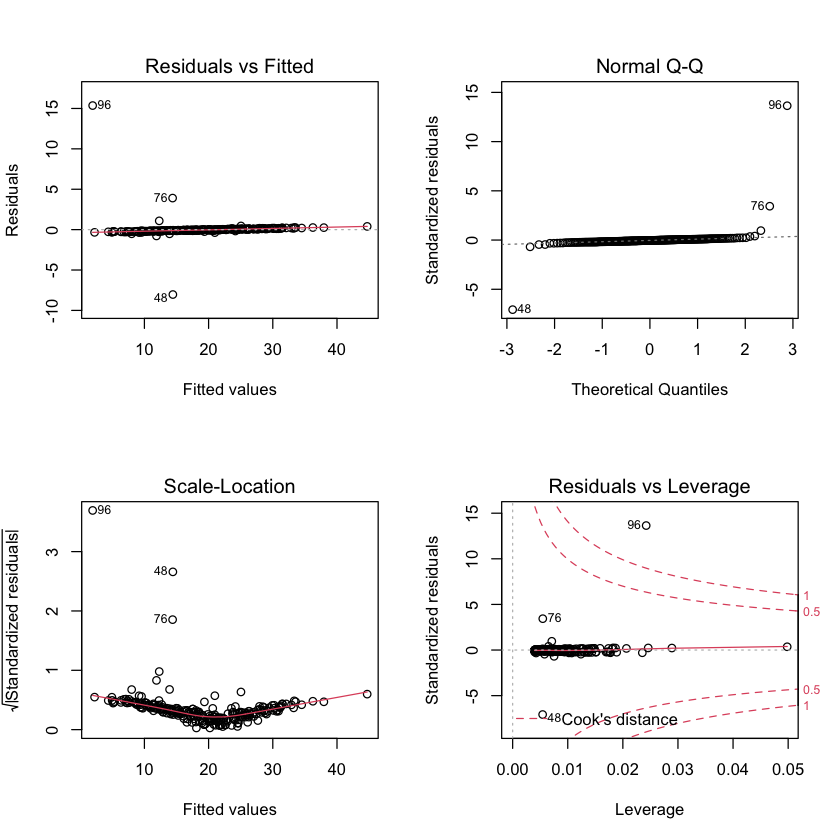

In [8]:
FirstFilterData[,"invDENSITY"]=1/FirstFilterData$DENSITY
SiriModel=lm(BODYFAT~invDENSITY,data=FirstFilterData)
par(mfrow=c(2,2)) 
plot(SiriModel)


jpeg(file="Image/Siri_Equation_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(SiriModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 7 x 7 in image



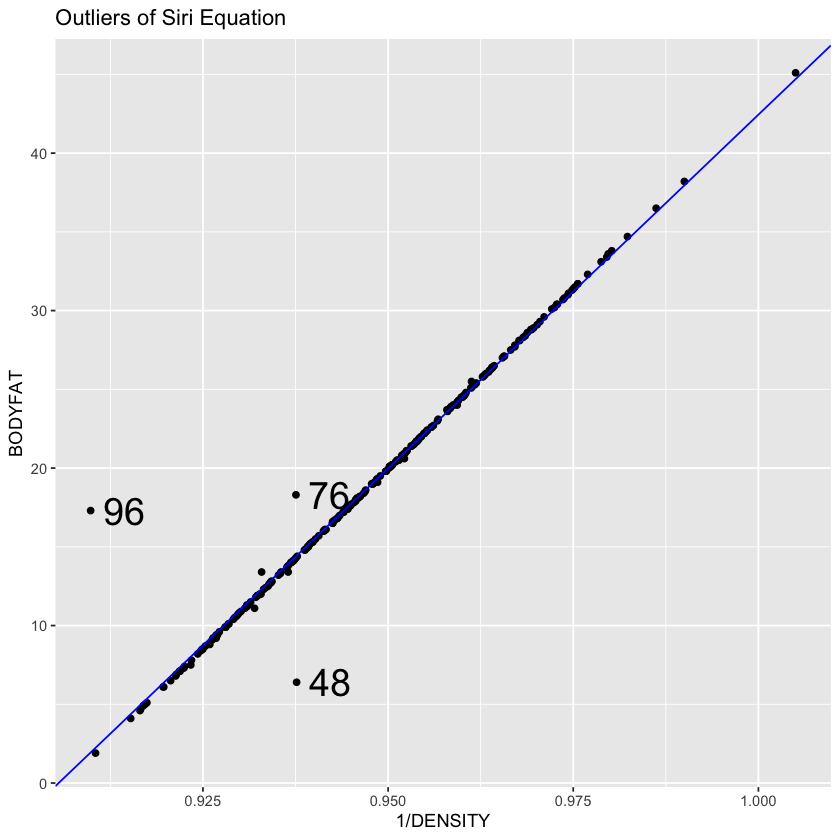

In [9]:
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)

g=ggplot(data=FirstFilterData)+geom_point(aes(x=invDENSITY,y=BODYFAT))+
geom_abline(intercept = SiriModel$coefficients[1],slope=SiriModel$coefficients[2],color="blue")+
xlab("1/DENSITY")+
ylab("BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=FirstFilterData[sirioutliers,],aes(x=invDENSITY,y=BODYFAT,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation.jpeg",g)
g

The second method is return the new BODYFAT with Siri equation and compare with initial one.

Saving 7 x 7 in image



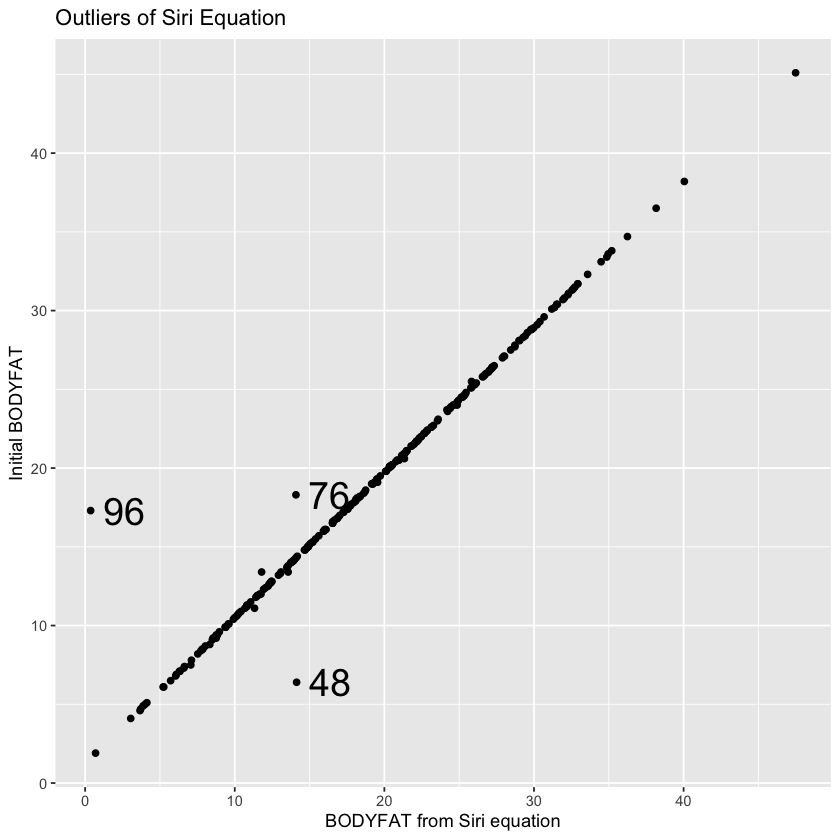

In [10]:
BODYFAT_Siri=495/FirstFilterData$DENSITY-450
OldBODYFAT=FirstFilterData$BODYFAT
OldIDNO=FirstFilterData$IDNO
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)
Plot_data=data.frame(cbind(BODYFAT_Siri,OldBODYFAT,OldIDNO))
g2=ggplot(data=Plot_data)+geom_point(aes(x=BODYFAT_Siri,y=OldBODYFAT))+
xlab("BODYFAT from Siri equation")+
ylab("Initial BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=Plot_data[sirioutliers,],aes(x=BODYFAT_Siri,y=OldBODYFAT,label=OldIDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation_new_bodyfat.jpeg",g2)
g2


From both methods, 96, 76, 48's BODYFAT do not meet their DENSITY by Siri Equation, we decide to use the Siri equation calculate their BODYFAT again and update.

In [11]:
for(i in c(96,76,48)){
  NewBODYFAT=495/FirstFilterData[FirstFilterData$IDNO==i,"DENSITY"]-450
  print(paste(i,"new BODYFAT:"))  
  print(NewBODYFAT)
}

for(i in c(96,76,48)){
  NewDENSITY=495/(FirstFilterData[FirstFilterData$IDNO==i,"BODYFAT"]+450)
  print(paste(i,"new DENSITY:"))  
  print(NewDENSITY)
}

[1] "96 new BODYFAT:"
[1] 0.3684833
[1] "76 new BODYFAT:"
[1] 14.09151
[1] "48 new BODYFAT:"
[1] 14.13502
[1] "96 new DENSITY:"
[1] 1.059277
[1] "76 new DENSITY:"
[1] 1.057015
[1] "48 new DENSITY:"
[1] 1.084575


We found that the new BODYFAT of 96 is too small compared with other people, we hold that there is error in DENSITY before we got this data instead of BODYFAT, so we decide to use the his initial BODYFAT to update his DENSITY with Siri equation, instead of changing his BODYFAT. 

BODYFAT of 48 also changed too high, but considering that BODYFAT is from DENSITY by Siri equation, we prefer to change BODYFAT first. 


In [12]:
SecondFilterData=FirstFilterData[,-which(names(FirstFilterData) %in% c("invDENSITY"))]
SecondFilterData[SecondFilterData$IDNO==48,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==48,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==76,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==76,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==96,"DENSITY"]=495/(SecondFilterData[SecondFilterData$IDNO==96,"BODYFAT"]+450)

### Outliers of BMI Equation

Just like BODYFAT and DENSITY. WEIGHT, HEIGHT and ADIPOSITY also meet BMI equation:

$$\text{ADIPOSITY} = \frac{703*\text{WEIGHT (lbs)}}{\text{HEIGHT(inches)}^{2}} $$

This equation is in imperial unit, pay attention to 703 in our equation. 

There are also two method to detect outliers.

The following four plots are outputs from linear regression between ADIPOSITY with WEIGHT/HEIGHT^2

We call the new variable with weight, height as BMIX

pdf 
  2

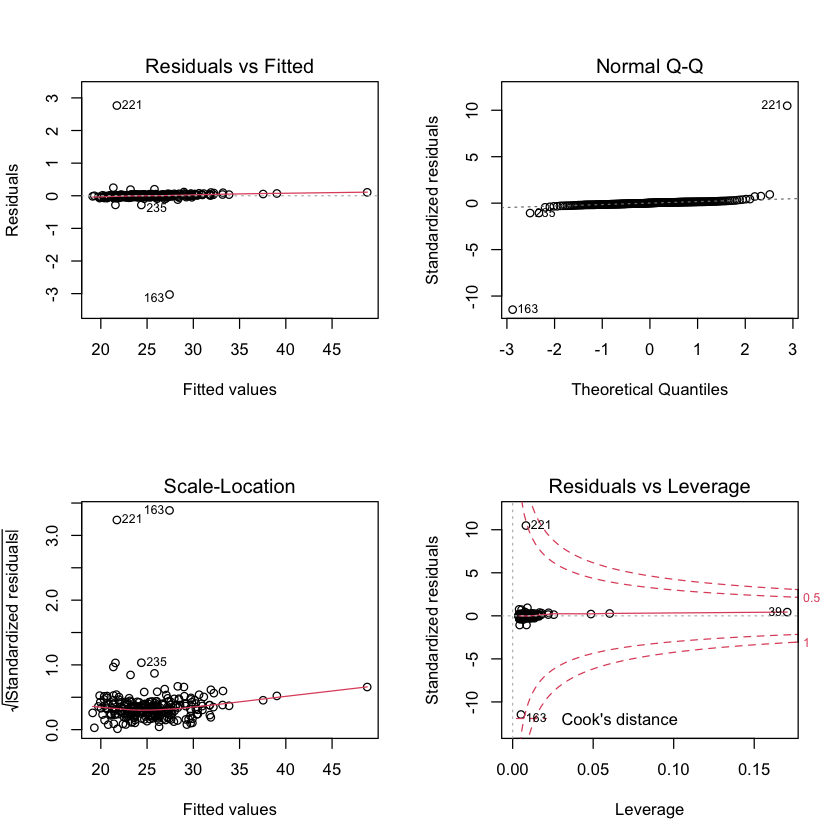

In [13]:
SecondFilterData[,"BMIX"]=(SecondFilterData$WEIGHT)/((SecondFilterData$HEIGHT)^2)
BMIModel=lm(ADIPOSITY~BMIX,data=SecondFilterData)
par(mfrow=c(2,2)) 
plot(BMIModel)
jpeg(file="Image/BMI_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(BMIModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 7 x 7 in image



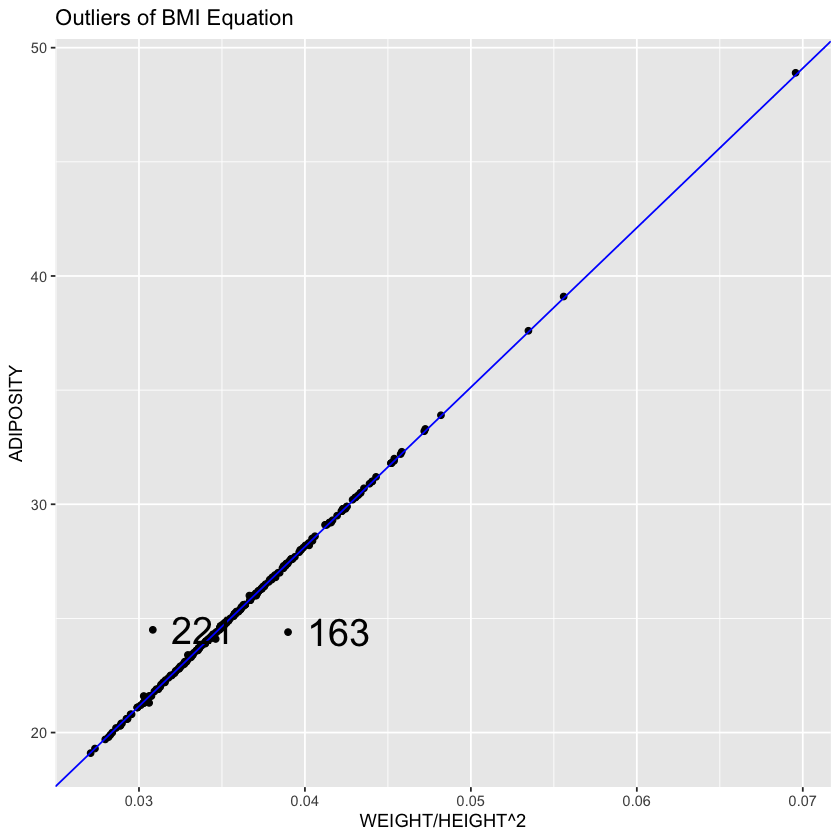

In [14]:
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)

g=ggplot(data=SecondFilterData)+geom_point(aes(x=BMIX,y=ADIPOSITY))+
geom_abline(intercept = BMIModel$coefficients[1],slope=BMIModel$coefficients[2],color="blue")+
xlab("WEIGHT/HEIGHT^2")+
ylab("ADIPOSITY")+
ggtitle("Outliers of BMI Equation")+
geom_text(data=SecondFilterData[bmioutliers,],aes(x=BMIX,y=ADIPOSITY,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_BMI_Equation.jpeg",g)
g

The second method is return the ADIPOSITY with BMI equation and compare the two.

Saving 7 x 7 in image



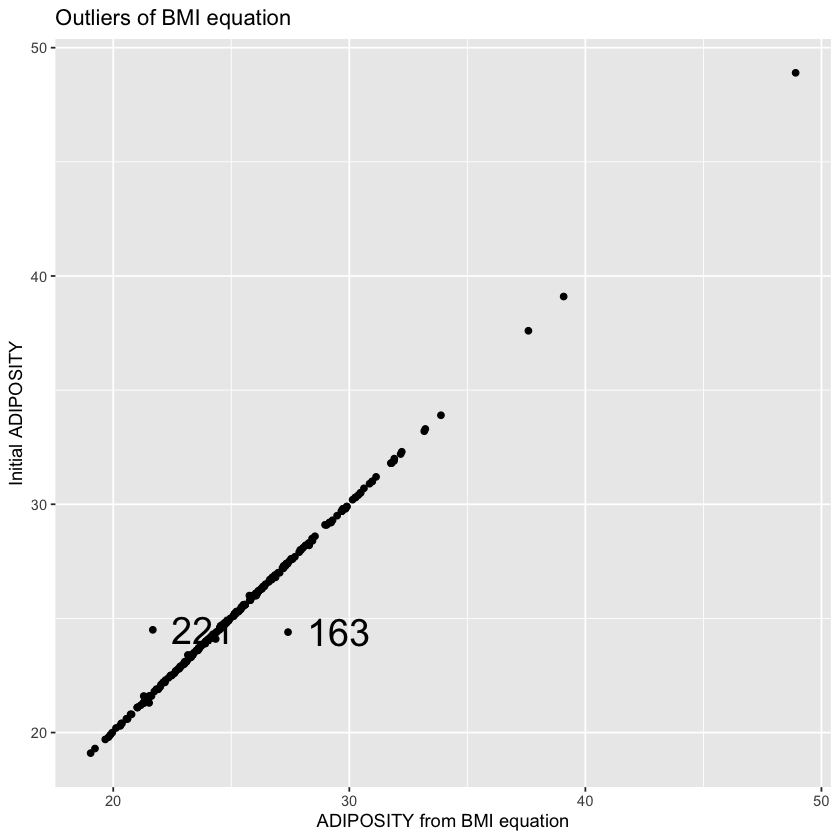

In [15]:
ADIPOSITY_BMI=703*SecondFilterData$WEIGHT/(SecondFilterData$HEIGHT)^2
OldADIPOSITY=SecondFilterData$ADIPOSITY
OldIDNO=SecondFilterData$IDNO
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)
Plot_data=data.frame(cbind(ADIPOSITY_BMI,OldADIPOSITY,OldIDNO))
g2=ggplot(data=Plot_data)+geom_point(aes(x=ADIPOSITY_BMI,y=OldADIPOSITY))+
xlab("ADIPOSITY from BMI equation")+
ylab("Initial ADIPOSITY")+
ggtitle("Outliers of BMI equation")+
geom_text(data=Plot_data[bmioutliers,],aes(x=ADIPOSITY_BMI,y=OldADIPOSITY,label=OldIDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_BMI_Equation_new_ADIPOSITY.jpeg",g2)
g2


In two methods, the two outliers is 221 and 163, their new BMI is:

In [16]:
NewBMI=c()
for(i in c(163,221)){
  NewBMI=c(NewBMI,703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
  print(paste(i,"new BMI is:"))
  print(703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
}
NewBMI

[1] "163 new BMI is:"
[1] 27.40422
[1] "221 new BMI is:"
[1] 21.67592


[1] 27.40422 21.67592

No problem, they are in normal range, update their new BMI:

In [17]:
CleanData=SecondFilterData[,-which(names(SecondFilterData) %in% c("BMIX"))]
CleanData[CleanData$IDNO==163,"ADIPOSITY"]=NewBMI[1]
CleanData[CleanData$IDNO==221,"ADIPOSITY"]=NewBMI[2]
CleanData=data.frame(CleanData)
dim(CleanData)

[1] 251  17

Now we can update our data:

In [18]:
write.csv(CleanData,'Data/CleanData.csv',row.names = FALSE)

We can build a table for what we do in our dataset:

In [19]:
Fixed_IDNO=c(182,42,96,76,48,221,163)
Method=c("Delete for extreme value",
         "Fix HEIGHT by BMI equation",
         "Fix DENSITY by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix ADIPOSITY by BMI equation",
         "Fix ADIPOSITY by BMI equation")
Fix_Method=cbind(Fixed_IDNO,Method)
Fix_Method

Fixed_IDNO Method                       
[1,] 182        Delete for extreme value     
[2,] 42         Fix HEIGHT by BMI equation   
[3,] 96         Fix DENSITY by Siri equation 
[4,] 76         Fix BODYFAT by Siri equation 
[5,] 48         Fix BODYFAT by Siri equation 
[6,] 221        Fix ADIPOSITY by BMI equation
[7,] 163        Fix ADIPOSITY by BMI equation

In fact, there is a lot of extreme value in our dataset. But considering there is only about 250 observations, we prefer to fix observations instead of deleting them.

## Recheck by BMI and Siri equation

Recheck whether our CleanData meets BMI and Siri equation.

### Siri equation

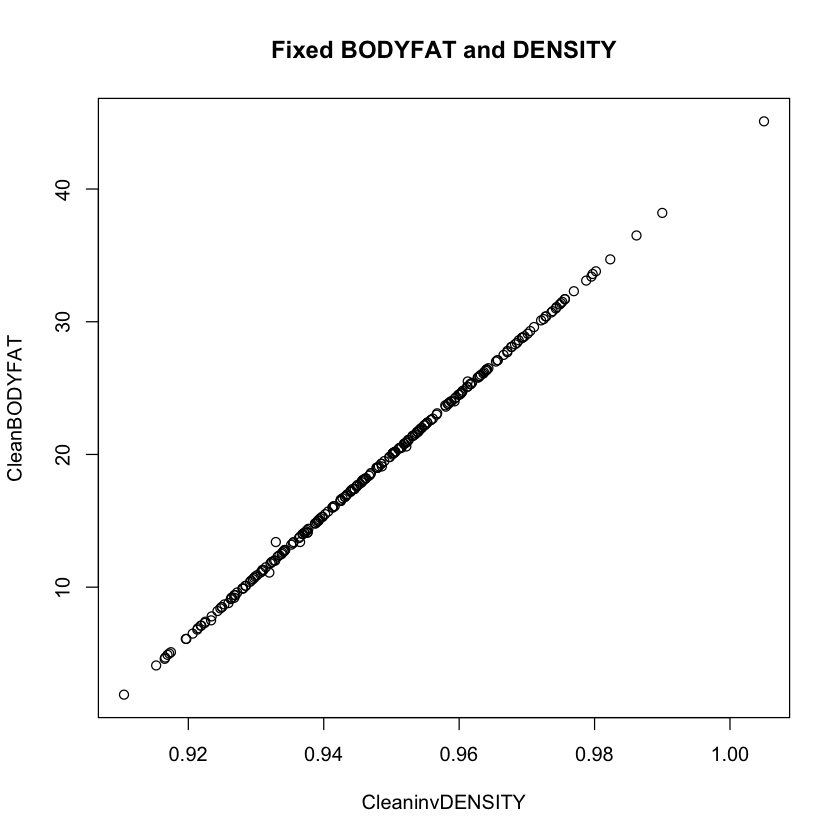

pdf 
  2

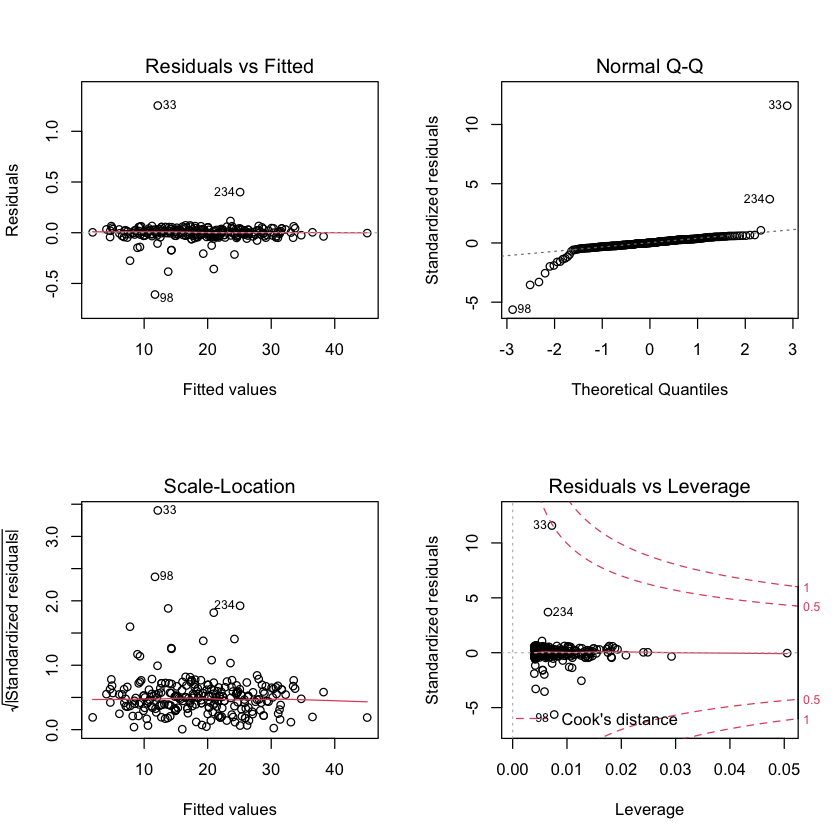

In [20]:
CleaninvDENSITY=1/(CleanData$DENSITY)
CleanBODYFAT=CleanData$BODYFAT
SiriModel=lm(CleanBODYFAT~CleaninvDENSITY)
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY")
par(mfrow=c(2,2)) 
plot(SiriModel)

jpeg(file="Image/Fixed_BODYFAT_and_DENSITY.jpeg")
par(mfrow=c(3,2))
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY") 
plot(SiriModel)
dev.off()

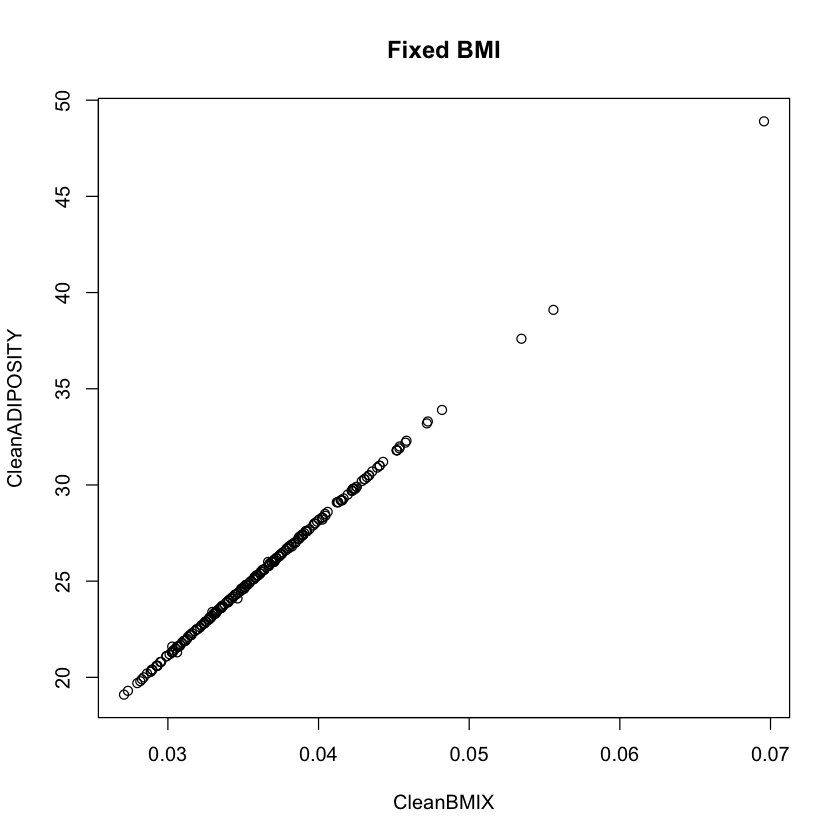

pdf 
  2

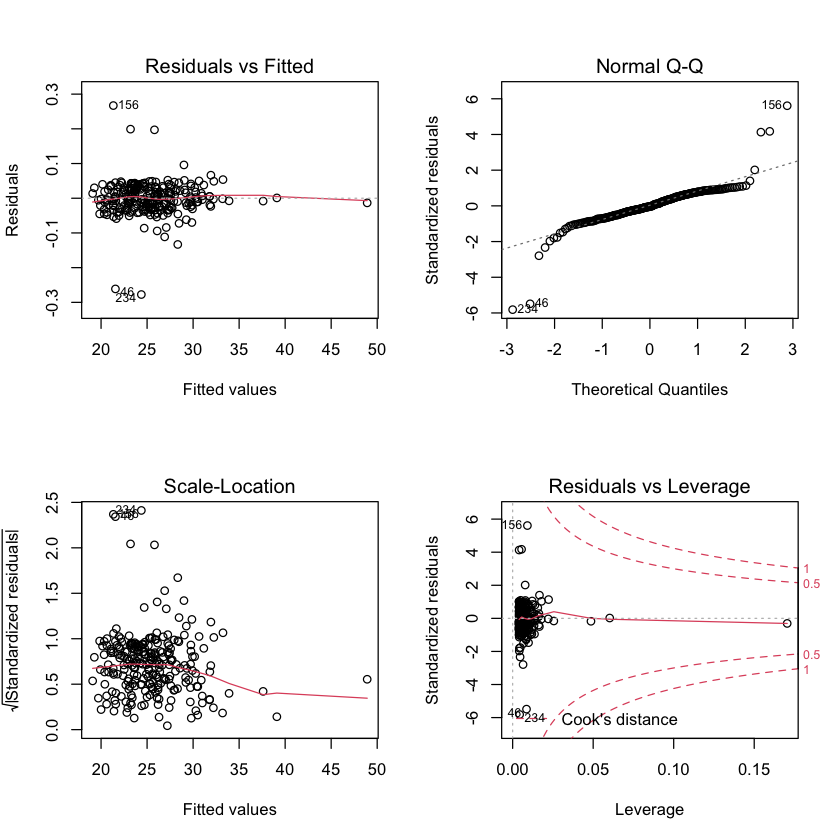

In [21]:

CleanADIPOSITY=CleanData$ADIPOSITY
CleanBMIX=(CleanData$WEIGHT)/((CleanData$HEIGHT)^2)
BMIModel=lm(CleanADIPOSITY~CleanBMIX)
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI")
par(mfrow=c(2,2)) 
plot(BMIModel)

jpeg(file="Image/Fixed_BMI.jpeg")
par(mfrow=c(3,2))
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI") 
plot(BMIModel)
dev.off()

There is no outliers from BMI and Siri equation now. 

## Model Build-Linear Regression

After discussion in our group, we decide to use linear regression to build our model, the reasons are:

1. There are a lot of variables in our data, but not all of them are connected with BODYFAT, linear regression can show us the significance of variables.

2. Linear regression is simple, we want our model can be explained easily to those who are not a data scientist.

3. We want our model can be fixed easily, in linear regression, you can add or remove variables as you want if you want these model precise or simple.

4. The simple linear regression of all variables below performs well.

5. We want our model can be builded again if you read our document, the results must be stale too. Some model such as neural networks, it is too complicated, and its training contains randomness which will change the final models. 

In [22]:
RawCleanData = read.csv("Data/CleanData.csv",sep=",")
head(RawCleanData)

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP  
1 1    12.6    1.0708  23  154.25 67.75  23.7      36.2  93.1  85.2    94.5
2 2     6.9    1.0853  22  173.25 72.25  23.4      38.5  93.6  83.0    98.7
3 3    24.6    1.0414  22  154.00 66.25  24.7      34.0  95.8  87.9    99.2
4 4    10.9    1.0751  26  184.75 72.25  24.9      37.4 101.8  86.4   101.2
5 5    27.8    1.0340  24  184.25 71.25  25.6      34.4  97.3 100.0   101.9
6 6    20.6    1.0502  24  210.25 74.75  26.5      39.0 104.5  94.4   107.8
  THIGH KNEE ANKLE BICEPS FOREARM WRIST
1 59.0  37.3 21.9  32.0   27.4    17.1 
2 58.7  37.3 23.4  30.5   28.9    18.2 
3 59.6  38.9 24.0  28.8   25.2    16.6 
4 60.1  37.3 22.8  32.4   29.4    18.2 
5 63.2  42.2 24.0  32.2   27.7    17.7 
6 66.0  42.0 25.6  35.7   30.6    18.8

IDNO and DENSITY will not be included into our model. 

In [23]:
WholeCleanData=RawCleanData
CleanData=RawCleanData[,-c(1,3)]
n=dim(CleanData)[1]
head(CleanData)
dim(CleanData)

BODYFAT AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP   THIGH KNEE ANKLE
1 12.6    23  154.25 67.75  23.7      36.2  93.1  85.2    94.5 59.0  37.3 21.9 
2  6.9    22  173.25 72.25  23.4      38.5  93.6  83.0    98.7 58.7  37.3 23.4 
3 24.6    22  154.00 66.25  24.7      34.0  95.8  87.9    99.2 59.6  38.9 24.0 
4 10.9    26  184.75 72.25  24.9      37.4 101.8  86.4   101.2 60.1  37.3 22.8 
5 27.8    24  184.25 71.25  25.6      34.4  97.3 100.0   101.9 63.2  42.2 24.0 
6 20.6    24  210.25 74.75  26.5      39.0 104.5  94.4   107.8 66.0  42.0 25.6 
  BICEPS FOREARM WRIST
1 32.0   27.4    17.1 
2 30.5   28.9    18.2 
3 28.8   25.2    16.6 
4 32.4   29.4    18.2 
5 32.2   27.7    17.7 
6 35.7   30.6    18.8

[1] 251  15

### Heat plot for correlation

Calculate the correlation between two variables

pdf 
  2

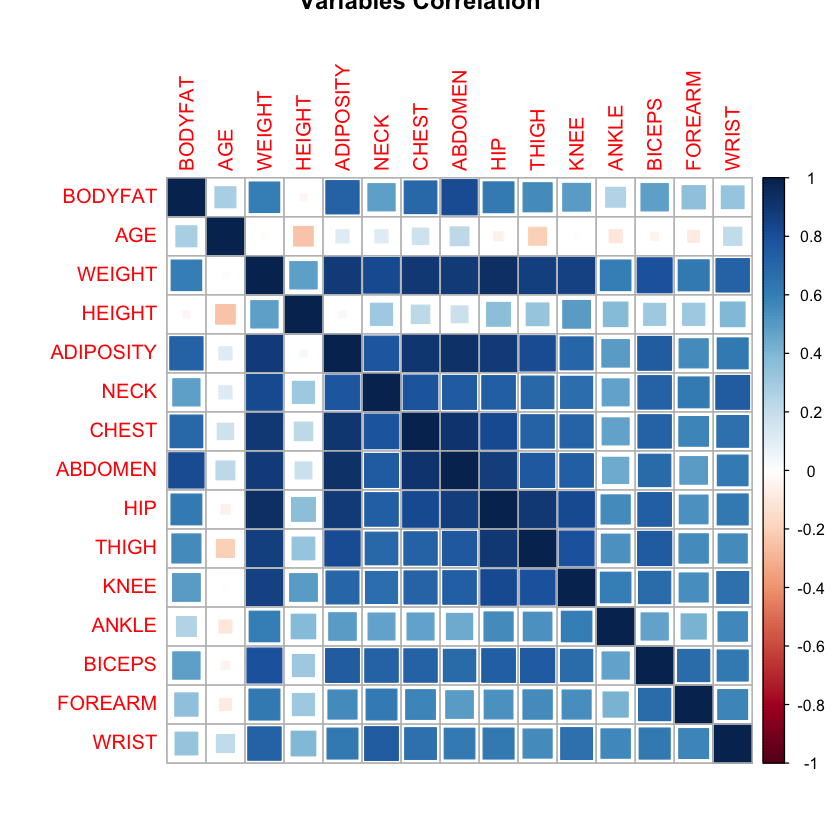

In [24]:
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation', method = "square")
jpeg(file="Image/Variables Correlation.jpeg")
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation', method = "square")
dev.off()

Most of variables are highly correlated, we will consider the simple model with as few variables as possible in our model.

### VIF test

We test the VIF of the simple linear regression of all variables. VIF show the multicollinearity in linear regression model. Once the max VIF is larger than 10 or mean variables' VIF is larger than 1. We regard that there exists multicollinearity. Multicollinearity is harmful to model, the model with too many variables which has multicollinearity may be regarded as ill one.

In [25]:
SLR = lm(BODYFAT~.,data=CleanData) 
vif = car::vif(SLR) 
mean(vif) 
rbind(vif)

[1] 40.77773

AGE      WEIGHT   HEIGHT   ADIPOSITY NECK     CHEST    ABDOMEN  HIP     
vif 2.248236 243.8483 52.25486 205.6434  4.385078 10.58841 13.11614 14.97992
    THIGH    KNEE     ANKLE    BICEPS   FOREARM  WRIST   
vif 7.892154 4.817457 1.930859 3.648018 2.213776 3.321594

Weight enjoys the largest VIF, and there exist serious multicollinearity, therefore in our model we will consider as few variables as possible. 

### BOXCOX test

BOXCOX test can show is there any necessary to transformation, the $\lambda$ from BOXCOX is an optimal for transformation as:

$$
y(\lambda)=\left\{\begin{array}{ll}\frac{y^{\lambda}-1}{\lambda}, & \text { if } \lambda \neq 0 \\ \log y, & \text { if } \lambda=0\end{array}\right.
$$

[1] 1.070707

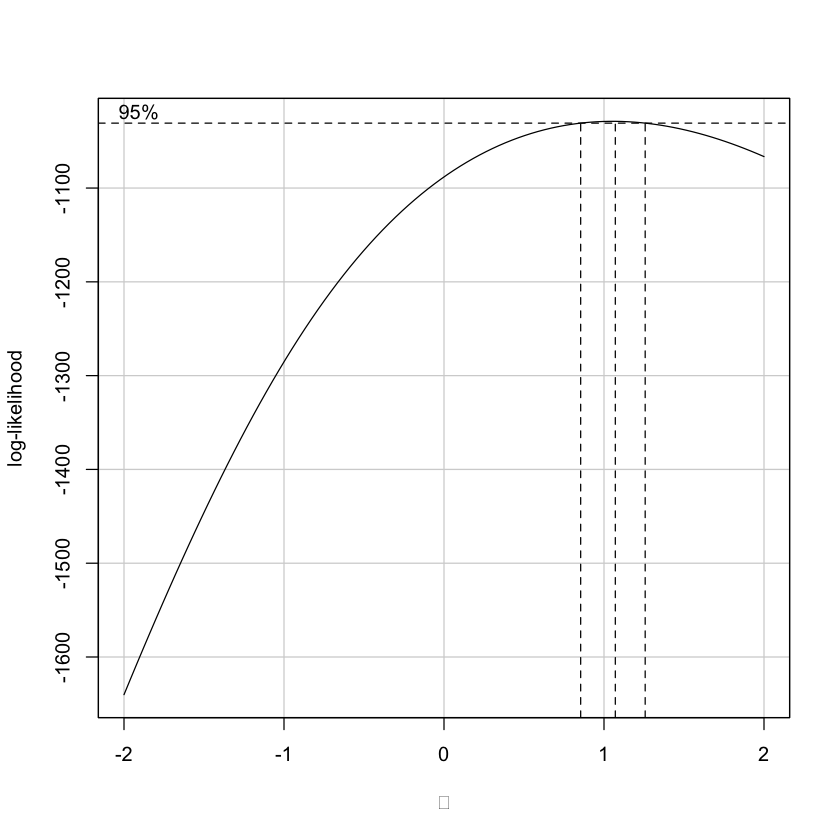

In [26]:
bc=boxCox(SLR)
lambda=bc$x[which(bc$y==max(bc$y))]
lambda

The $\lambda$ is close to 1. It seems that there is no necessary for transformation.

### Simple linear regression of all variables

First we will try use simple linear regression on all variables. In the following output we can see that there is a lot of variables are not significant from p-value, means that there may be not necessary to take them into consideration when we build our model, therefore we will run variables selection steps to simplify our model.

In [27]:
summary(SLR)


Call:
lm(formula = BODYFAT ~ ., data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6560 -2.5883 -0.2221  2.8161  9.1615 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -123.90288   48.25570  -2.568  0.01086 *  
AGE            0.05955    0.02949   2.019  0.04460 *  
WEIGHT        -0.38058    0.13279  -2.866  0.00453 ** 
HEIGHT         1.62271    0.68747   2.360  0.01907 *  
ADIPOSITY      2.44844    0.97966   2.499  0.01313 *  
NECK          -0.43660    0.21474  -2.033  0.04316 *  
CHEST         -0.08535    0.09692  -0.881  0.37938    
ABDOMEN        0.85143    0.08400  10.135  < 2e-16 ***
HIP           -0.26236    0.13505  -1.943  0.05324 .  
THIGH          0.21465    0.13406   1.601  0.11068    
KNEE           0.08273    0.22755   0.364  0.71651    
ANKLE          0.08937    0.20436   0.437  0.66227    
BICEPS         0.17096    0.15738   1.086  0.27845    
FOREARM        0.34343    0.18395   1.867  0.06315 .  
WRIST         -

pdf 
  2

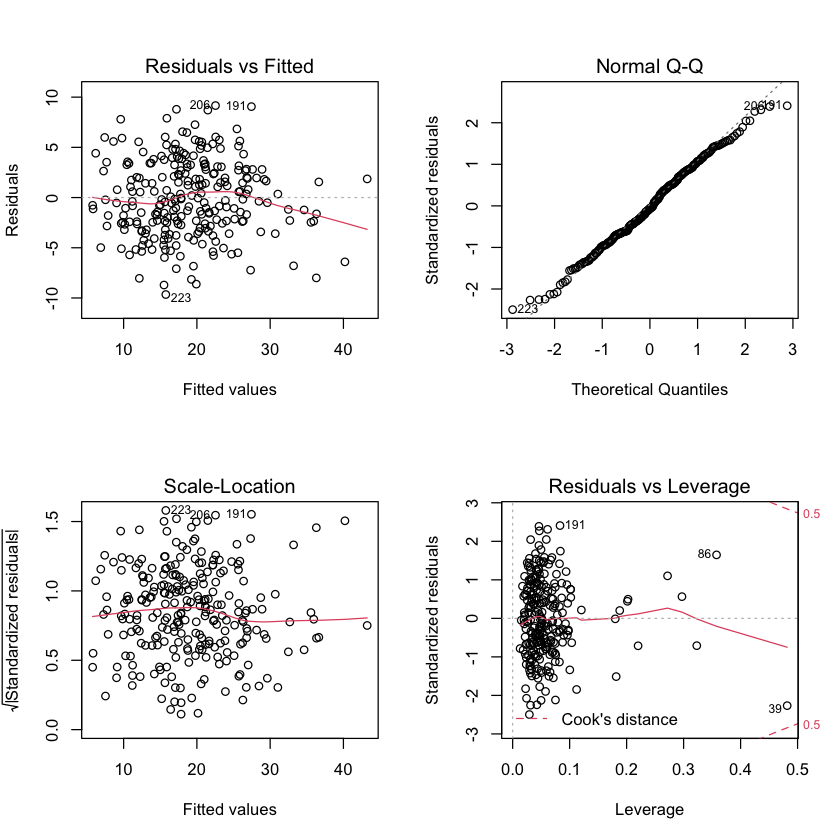

In [28]:
par(mfrow=c(2,2)) 
plot(SLR) 

jpeg(file="Image/Simple_Linear_Regression_Analysis.jpeg")
par(mfrow=c(2,2)) 
plot(SLR) 
dev.off()

## Variable selection-Regression Trees

First variables selection is based on regression trees.

In [29]:
library(gbm)
library(randomForest)
set.seed(628)
train.ind <- sample(1:nrow(CleanData),0.6*nrow(CleanData))
train.dat <- CleanData[train.ind,]
test.dat <- CleanData[-train.ind,]

Decision tree is a machine learning method that can be applied to both regression and classification problems. With decision tree, we can capture the variables that plays important role on our outcome. Decision tree split the dataset into many of square regions. Several number of step need to be taken in this spliting steps. In each step, by the some meaningful value(threshold) of a variable, the dataset  divided into two region and after that one of two region also divided into two according to another meaningful value(threshold) of another variable. This step should be taken until the very last of variable. Our goal is to find square regions R1,...,Rj that minimize the RSS given by

$$
    RSS=\sum_{j=1}^{J}\sum_{i \in Rj}(y_{i}-\hat{y}_{Rj})^{2}
$$

Usually decision tree are used with some algorithms, since the decision tree's mechanism is using recursive binary splitting so it can produce different result in every different attempt. Hence, we used boosting, random forest and bagging algorithms.

Since all variables we have in our dataset are quantitative variables, we used regression tree to analyze data. The regression tree gives us the important variables that play an important role in outcome(Bodyfat). We divided our dataset in to two different dataset which are training dataset and test dataset. We decided to train our data first and then fit the trained model on test dataset. Normally, there are two important hyperparameter in regression tree with boosting, which are interaction depth and lambada (About tuning hyperparameters and its role refer An Introduction to Statistical Learning (2013) G.James et al. page 316-324.).

At the first step, we had looked for a lambda value that returns minimum of mean square error.

### Important Information: The following code will takes about 20 mins to finish.

[1] 0.01995262

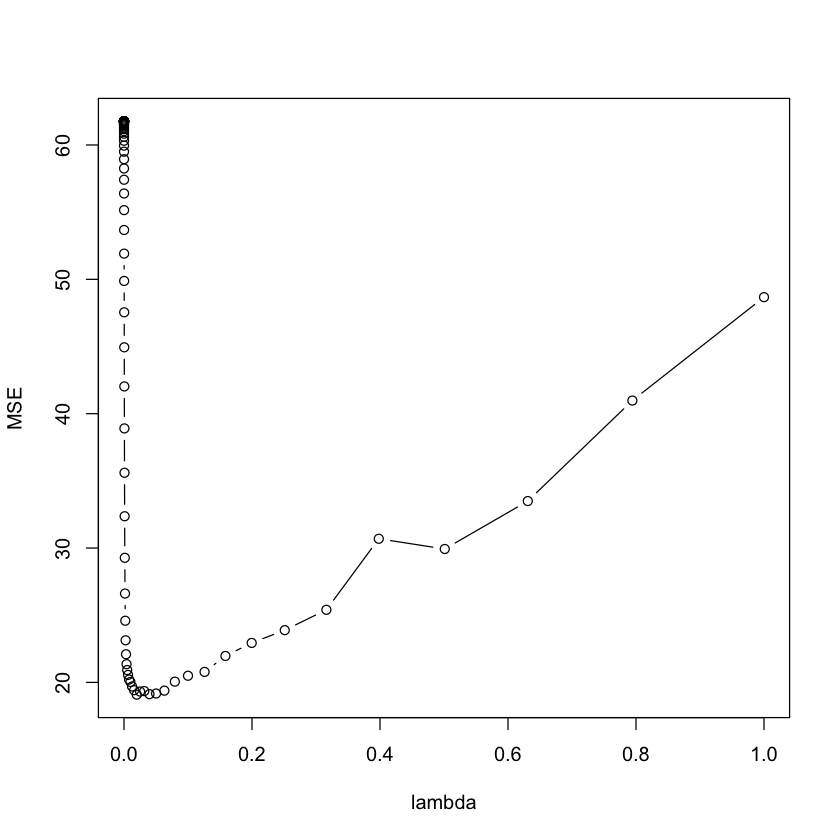

In [30]:
pow <- seq(-10, 0, by = 0.1)
lambdas <- 10^pow
test.boosting.MSE <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=1000, interaction.depth = 1, distribution = "gaussian", shrinkage = lambdas[i], cv.folds = 10)
  test.pred <- predict(boost.dat, test.dat, n.trees=1000)
  test.boosting.MSE[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}
plot(lambdas, test.boosting.MSE, type="b", xlab = "lambda", ylab="MSE")

min.lambda <- lambdas[which.min(test.boosting.MSE)]
min.lambda


In [31]:
jpeg(file="Image/tree_method_lambda.jpeg")
plot(lambdas, test.boosting.MSE, type="b", xlab = "lambda", ylab="MSE")
dev.off()

pdf 
  2

Here, we picked the lambda that minimize the mean squared error(MSE), 0.01995.

In [32]:
#boosting with depth =1
test.boosting.MSE1 <- rep(NA, 1000)
for (i in 1:1000) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=i, interaction.depth = 1, distribution = "gaussian", shrinkage = min.lambda)
  test.pred <- predict(boost.dat, test.dat, n.trees=i)
  test.boosting.MSE1[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}

#boosting with depth =2
test.boosting.MSE2 <- rep(NA, 1000)
for (i in 1:1000) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=i, interaction.depth = 2, distribution = "gaussian", shrinkage = min.lambda)
  test.pred <- predict(boost.dat, test.dat, n.trees=i)
  test.boosting.MSE2[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}

#randomforest
test.rf.MSE <- rep(NA, length=1000)
for(i in 1:1000){
  set.seed(628)
  rf.dat = randomForest(BODYFAT~.-BODYFAT, data=train.dat, mtry = floor(sqrt(14)), ntree=i)
  yhat.rf = predict(rf.dat, newdata = test.dat)
  test.rf.MSE[i] <- sum((test.dat$BODYFAT-yhat.rf)^2)/dim(test.dat)[1]
  }

#bagging
test.bag.MSE <- rep(NA, length=1000)
for(i in 1:1000){
  set.seed(628)
  bag.dat = randomForest(BODYFAT~.-BODYFAT, data=train.dat, mtry = 14, ntree=i)
  yhat.bag = predict(bag.dat, newdata = test.dat)
  test.bag.MSE[i] <- sum((test.dat$BODYFAT-yhat.bag)^2)/dim(test.dat)[1]
  }

For the second step we used four different analysis methods to see which performs better on our dataset, and produced the plots according to the number of trees.

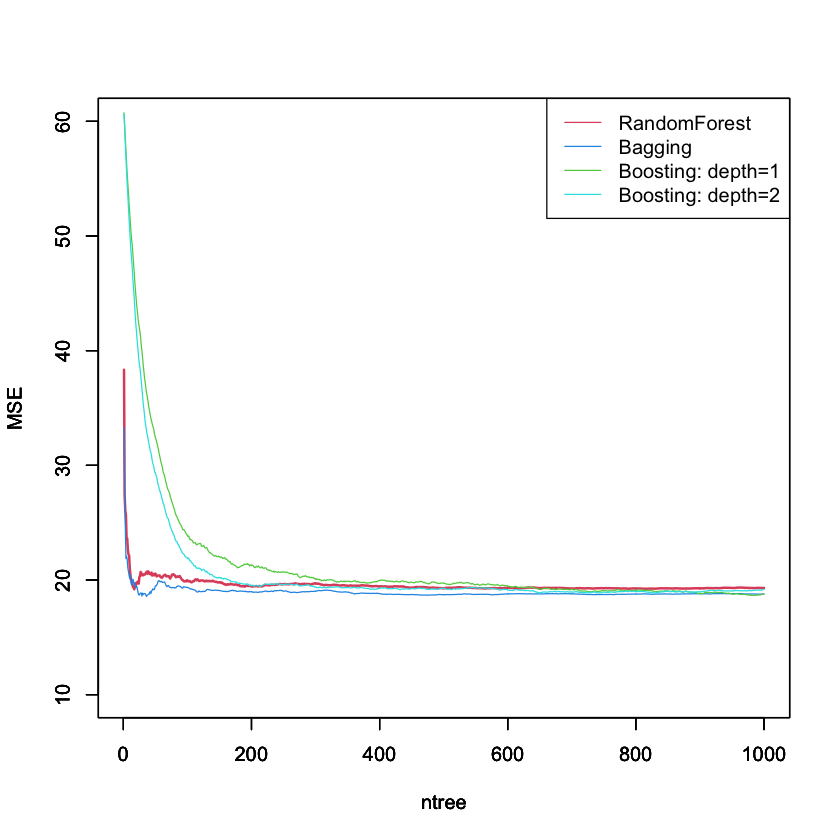

In [33]:
ntree <- 1:1000
plot(ntree, test.rf.MSE, type = 'l', ylab="MSE", col=2, ylim=c(10,60), lwd = 2)
par(new=T)
plot(ntree, test.bag.MSE, type = 'l', ylab="MSE", ylim=c(10,60), col=4)
par(new=T)
plot(ntree, test.boosting.MSE1, type = 'l', ylab="MSE", ylim=c(10,60), col=3)
par(new=T)
plot(ntree, test.boosting.MSE2, type = 'l', ylab="MSE", ylim=c(10,60), col=5)
legend("topright", c("RandomForest","Bagging","Boosting: depth=1", "Boosting: depth=2"), lwd=c(1,1), col=c(2,4,3,5))

By the plot. we choose that Bagging and Boosting with depth 2 as two models to find important variables on our dataset

IncNodePurity
AGE         310.9925   
WEIGHT      340.8834   
HEIGHT      589.0339   
ADIPOSITY   330.2657   
NECK        355.3410   
CHEST       268.0371   
ABDOMEN   10306.9719   
HIP         280.7667   
THIGH       226.7634   
KNEE        278.1506   
ANKLE       274.2575   
BICEPS      234.9343   
FOREARM     196.5622   
WRIST       368.8187

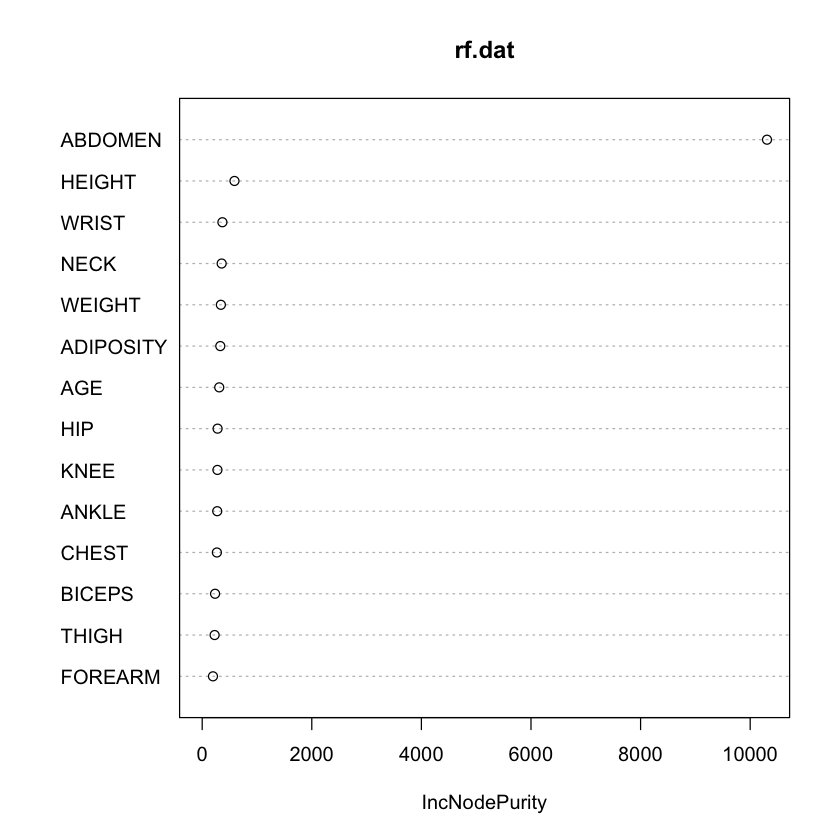

var       rel.inf  
ABDOMEN   ABDOMEN   55.314669
ADIPOSITY ADIPOSITY  4.976397
HEIGHT    HEIGHT     4.807074
AGE       AGE        4.411214
WRIST     WRIST      4.229550
BICEPS    BICEPS     4.187357
NECK      NECK       3.654591
HIP       HIP        3.284177
THIGH     THIGH      2.909824
CHEST     CHEST      2.599514
FOREARM   FOREARM    2.497746
ANKLE     ANKLE      2.492020
KNEE      KNEE       2.374692
WEIGHT    WEIGHT     2.261175

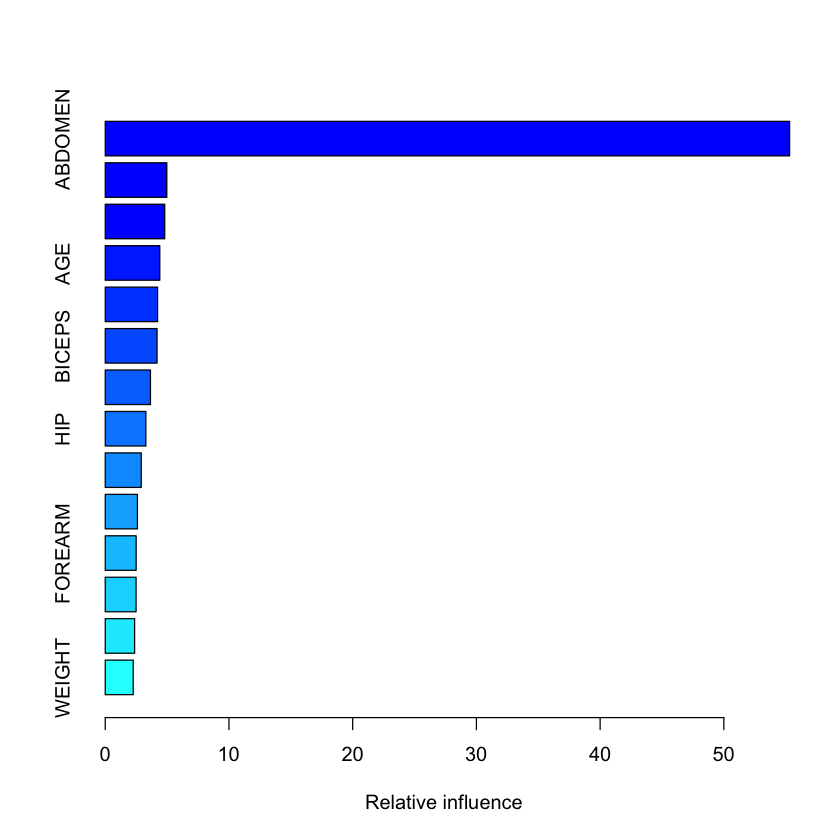

In [34]:
#randomforest
set.seed(628)
rf.dat = randomForest(BODYFAT~.-BODYFAT,data=CleanData, mtry = 14, ntree=1000)
importance(rf.dat)
varImpPlot(rf.dat)

#boosting
set.seed(628)
boost.dat <- gbm(BODYFAT~.-BODYFAT, data=CleanData, n.trees = 1000, interaction.depth = 2, distribution = "gaussian", shrinkage = min.lambda)
summary(boost.dat)

Hence, we analyze our data with Bagging and Boosting with depth 2. We obtained result as above. By the random forest, we figured out variable Abdomen plays important role on our outcome, Bodyfat. However, we obtained slightly different result from Boosting with depth=2, but Abdomen is selected as the most important variables that play important role on Bodyfat too.  Therefore we will study the linear regression with the variables above in the model selection steps.

## Variable selection-Simple Linear Regression

Although there is no necessary for transformation on Y variabls in model, we still want to try is there any space for model improvement when we use transformation on X variables. Because all variables is positive, we try use log and square transformation for all variables. 
    
    
The simple model is SLR0=lm(BODYFAT~1,data=ExtendData), without any variable.

SLR_Full uses all variables without transformation, such as AGE, WEIGHT,...

SLR_Log_Full uses all variables with log transformation, such as log(AGE), log(WEIGHT),...

SLR_sq_Full uses all variables with square transformation, such as AGE^2, WEIGHT^2,...

SLR_All_Full uses all variables without transformation or with both kinds of transformations, such as AGE, log(AGE), AGE^2, ...

This method is inspired by STAT601 of Mohamed Elkhouly. It may be strange, because it is difficult to explain the meaning of log(AGE) or AGE^2, but note that this method is to find the best model, we just want to study any space for model improvement. 

In [35]:
LogAGE=log(CleanData$AGE)
LogWEIGHT=log(CleanData$WEIGHT)
LogHEIGHT=log(CleanData$HEIGHT)
LogADIPOSITY=log(CleanData$ADIPOSITY)
LogNECK=log(CleanData$NECK)
LogCHEST=log(CleanData$CHEST)
LogABDOMEN=log(CleanData$ABDOMEN)
LogHIP=log(CleanData$HIP)
LogTHIGH=log(CleanData$THIGH)
LogKNEE=log(CleanData$KNEE)
LogANKLE=log(CleanData$ANKLE)
LogBICEPS=log(CleanData$BICEPS)
LogFOREARM=log(CleanData$FOREARM)
LogWRIST=log(CleanData$WRIST)

sqAGE=CleanData$AGE^2
sqWEIGHT=CleanData$WEIGHT^2
sqHEIGHT=CleanData$HEIGHT^2
sqADIPOSITY=CleanData$ADIPOSITY^2
sqNECK=CleanData$NECK^2
sqCHEST=CleanData$CHEST^2
sqABDOMEN=CleanData$ABDOMEN^2
sqHIP=CleanData$HIP^2
sqTHIGH=CleanData$THIGH^2
sqKNEE=CleanData$KNEE^2
sqANKLE=CleanData$ANKLE^2
sqBICEPS=CleanData$BICEPS^2
sqFOREARM=CleanData$FOREARM^2
sqWRIST=CleanData$WRIST^2

ExtendData=cbind(CleanData,LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST
                 ,sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST)

SLR0=lm(BODYFAT~1,data=ExtendData)
SLR_Full=lm(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData)
SLR_Log_Full=lm(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData)
SLR_sq_Full=lm(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData)
SLR_All_Full=lm(BODYFAT~.,data=ExtendData)

### Variable selection-All possible subsets methods

Subsets methods is to find a small subset of variables which are good to predict BODYFAT. The index for subsets method in R can be BIC, Cp and others. 

BIC and AIC are both penalized-likelihood criteria considering both prediction error and model complexity.  Model with small BIC or AIC is better. 

Cp assess the fit of a regression model, a small Cp value indicates that the model is relatively precise.

All possible subsets methods with leaps package. First method to variables selection method is subsets methods, it will choose the best model with BIC, Cp and other index based on the four kinds of full model. 

Although some complex models have better performance, we still do not want to choose them for they are too complex. 

### No transformation

In [36]:
LeapsResults_Full=regsubsets(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Full_Table=cbind(summary(LeapsResults_Full)$which,summary(LeapsResults_Full)$rsq,summary(LeapsResults_Full)$rss,summary(LeapsResults_Full)$adjr2,summary(LeapsResults_Full)$cp,summary(LeapsResults_Full)$bic)
dimnames(LeapsResults_Full_Table)[[2]]=c(dimnames(summary(LeapsResults_Full)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Full_Table

(Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE
1 1           0   0      0      0         0    0     1       0   0     0   
2 1           0   1      0      0         0    0     1       0   0     0   
3 1           0   1      0      0         0    0     1       0   0     0   
4 1           0   1      0      0         0    0     1       0   0     0   
5 1           0   1      0      0         1    0     1       0   0     0   
  ANKLE BICEPS FOREARM WRIST rsq       rss      adjrsq    cp       bic      
1 0     0      0       0     0.6564394 5018.488 0.6550596 78.61020 -257.1154
2 0     0      0       0     0.7148231 4165.660 0.7125233 25.27690 -298.3397
3 0     0      0       1     0.7244137 4025.568 0.7210665 18.18741 -301.4007
4 0     0      1       1     0.7314657 3922.557 0.7270993 13.50385 -302.3817
5 0     0      1       1     0.7347444 3874.665 0.7293310 12.39651 -299.9396

We choose:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN+WEIGHT

BODYFAT~ABDOMEN+WEIGHT+WRIST

### log transformation

In [37]:
LeapsResults_Log=regsubsets(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Log_Table=cbind(summary(LeapsResults_Log)$which,summary(LeapsResults_Log)$rsq,summary(LeapsResults_Log)$rss,summary(LeapsResults_Log)$adjr2,summary(LeapsResults_Log)$cp,summary(LeapsResults_Log)$bic)
dimnames(LeapsResults_Log_Table)[[2]]=c(dimnames(summary(LeapsResults_Log)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Log_Table

(Intercept) LogAGE LogWEIGHT LogHEIGHT LogADIPOSITY LogNECK LogCHEST
1 1           0      0         0         0            0       0       
2 1           0      1         0         0            0       0       
3 1           0      0         1         0            0       0       
4 1           0      0         1         0            1       0       
5 1           1      0         1         0            1       0       
  LogABDOMEN LogHIP LogTHIGH LogKNEE LogANKLE LogBICEPS LogFOREARM LogWRIST
1 1          0      0        0       0        0         0          0       
2 1          0      0        0       0        0         0          0       
3 1          0      0        0       0        0         0          1       
4 1          0      0        0       0        0         0          1       
5 1          0      0        0       0        0         0          1       
  rsq       rss      adjrsq    cp        bic      
1 0.6687961 4837.990 0.6674660 68.056522 -266.3094
2 0.7143324 4172.828 0.7120286 26.740291 -297.9082
3 0.7301713 3941.464 0.7268941 13.673545 -306.7002
4 0.7364535 3849.699 0.7321682  9.697664 -307.0876
5 0.7400156 3797.666 0.7347098  8.309236 -304.9778

We choose:

BODYFAT~LogABDOMEN

BODYFAT~LogABDOMEN+LogWEIGHT

BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST

### Square transformation

In [38]:
LeapsResults_Square=regsubsets(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Square_Table=cbind(summary(LeapsResults_Square)$which,summary(LeapsResults_Square)$rsq,summary(LeapsResults_Square)$rss,summary(LeapsResults_Square)$adjr2,summary(LeapsResults_Square)$cp,summary(LeapsResults_Square)$bic)
dimnames(LeapsResults_Square_Table)[[2]]=c(dimnames(summary(LeapsResults_Square)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Square_Table

(Intercept) sqAGE sqWEIGHT sqHEIGHT sqADIPOSITY sqNECK sqCHEST sqABDOMEN
1 1           0     0        0        0           0      0       1        
2 1           0     1        0        0           0      0       1        
3 1           0     1        0        0           0      0       1        
4 1           0     1        0        0           0      0       1        
5 1           0     1        0        0           0      0       1        
  sqHIP sqTHIGH sqKNEE sqANKLE sqBICEPS sqFOREARM sqWRIST rsq       rss     
1 0     0       0      0       0        0         0       0.6279492 5434.652
2 0     0       0      0       0        0         0       0.7092997 4246.342
3 0     1       0      0       0        0         0       0.7169639 4134.388
4 0     0       0      0       0        1         1       0.7246398 4022.265
5 0     0       1      0       0        1         1       0.7287433 3962.324
  adjrsq    cp        bic      
1 0.6264550 94.442355 -237.1190
2 0.7069554 21.784503 -293.5247
3 0.7135263 16.750807 -294.7056
4 0.7201624 11.706442 -296.0812
5 0.7232075  9.940522 -294.3244

We choose:

BODYFAT~sqABDOMEN

BODYFAT~sqABDOMEN+sqWEIGHT

BODYFAT~sqABDOMEN+sqWEIGHT+sqTHIGH

### All variables

In [39]:
LeapsResults=regsubsets(BODYFAT~.,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Table=cbind(summary(LeapsResults)$which,summary(LeapsResults)$rsq,summary(LeapsResults)$rss,summary(LeapsResults)$adjr2,summary(LeapsResults)$cp,summary(LeapsResults)$bic)
show(LeapsResults_Table)
LeapsResults_Table

  (Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE
1           1   0      0      0         0    0     0       0   0     0    0
2           1   0      0      0         0    0     0       1   0     0    0
3           1   0      0      0         0    0     0       1   0     0    0
4           1   0      0      0         0    0     0       1   0     0    0
5           1   0      0      0         0    0     0       1   0     0    0
  ANKLE BICEPS FOREARM WRIST LogAGE LogWEIGHT LogHEIGHT LogADIPOSITY LogNECK
1     0      0       0     0      0         0         0            0       0
2     0      0       0     0      0         0         0            0       0
3     0      0       0     0      0         0         0            0       0
4     0      0       0     0      0         0         0            0       0
5     0      0       0     0      0         0         0            0       0
  LogCHEST LogABDOMEN LogHIP LogTHIGH LogKNEE LogANKLE LogBICEPS LogFOREARM
1     

(Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH ⋯ sqKNEE
1 1           0   0      0      0         0    0     0       0   0     ⋯ 0     
2 1           0   0      0      0         0    0     1       0   0     ⋯ 0     
3 1           0   0      0      0         0    0     1       0   0     ⋯ 0     
4 1           0   0      0      0         0    0     1       0   0     ⋯ 0     
5 1           0   0      0      0         0    0     1       0   0     ⋯ 0     
  sqANKLE sqBICEPS sqFOREARM sqWRIST                                       
1 0       0        0         0       0.6687961 4837.990 0.6674660 77.147540
2 0       0        0         0       0.7274174 3981.692 0.7252191 21.775205
3 0       0        0         1       0.7380821 3825.909 0.7349010 13.337647
4 0       0        0         0       0.7437057 3743.764 0.7395383  9.833897
5 0       1        0         0       0.7475672 3687.358 0.7424155  8.054693
           
1 -266.3094
2 -309.6768
3 -314.1690
4 -314.0914
5 -312.3764

We choose:

BODYFAT~LogABDOMEN

BODYFAT~ABDOMEN + sqWEIGHT

BODYFAT~sqWRIST + sqWEIGHT + ABDOMEN

As you can see in the results, the ABDOMEN is the most important variable. WEIGHT, WRIST are also very important. 

### Variable selection-Forward directions

The forward direction model selection will find the best AIC or BIC model from the simplest model (lm(BODYFAT~1)) to four kinds of full models until no improvement space for AIC or BIC.

### No transformation with AIC

In [40]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=2)

Start:  AIC=1022.02
BODYFAT ~ 1

            Df Sum of Sq     RSS     AIC
+ ABDOMEN    1    9588.8  5018.5  755.85
+ ADIPOSITY  1    7573.3  7033.9  840.60
+ CHEST      1    7056.0  7551.3  858.41
+ HIP        1    5577.5  9029.8  903.29
+ WEIGHT     1    5360.8  9246.5  909.24
+ THIGH      1    4419.4 10187.9  933.58
+ KNEE       1    3637.7 10969.5  952.13
+ BICEPS     1    3445.0 11162.3  956.51
+ NECK       1    3383.2 11224.1  957.89
+ FOREARM    1    1789.8 12817.5  991.21
+ WRIST      1    1643.7 12963.6  994.06
+ AGE        1    1189.3 13418.0 1002.70
+ ANKLE      1     948.9 13658.3 1007.16
<none>                   14607.3 1022.02
+ HEIGHT     1      13.2 14594.0 1023.79

Step:  AIC=755.85
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    852.83 4165.7 711.10
+ WRIST      1    613.98 4404.5 725.10
+ NECK       1    539.13 4479.4 729.33
+ HEIGHT     1    485.63 4532.9 732.31
+ HIP        1    475.66 4542.8 732.86
+ KNEE       1    280.16 4738.3 743.43



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM + NECK + 
    BICEPS + AGE, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST      FOREARM         NECK  
  -23.33991      0.87724     -0.10156     -1.42992      0.42274     -0.42326  
     BICEPS          AGE  
    0.23567      0.03828  


AIC=698.35

BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM + NECK + BICEPS + AGE

### Log transformation with AIC

In [41]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=2)

Start:  AIC=1022.02
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    9769.3  4838.0  746.66
+ LogADIPOSITY  1    7911.3  6696.0  828.24
+ LogCHEST      1    7092.3  7515.0  857.20
+ LogHIP        1    5769.4  8837.9  897.90
+ LogWEIGHT     1    5624.9  8982.4  901.97
+ LogTHIGH      1    4534.4 10072.9  930.73
+ LogKNEE       1    3651.0 10956.3  951.83
+ LogBICEPS     1    3533.3 11074.0  954.51
+ LogNECK       1    3372.2 11235.1  958.14
+ LogFOREARM    1    1753.1 12854.1  991.93
+ LogWRIST      1    1620.6 12986.7  994.50
+ LogAGE        1    1210.4 13396.9 1002.31
+ LogANKLE      1    1044.1 13563.2 1005.40
<none>                      14607.3 1022.02
+ LogHEIGHT     1      12.9 14594.4 1023.80

Step:  AIC=746.66
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWEIGHT     1    665.16 4172.8 711.53
+ LogWRIST      1    657.47 4180.5 712.00
+ LogHEIGHT     1    557.29 4280.7 717.94
+ LogNECK       1    526.05 4311.9 719.77
+ LogHIP    


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWEIGHT + LogWRIST + LogFOREARM + 
    LogNECK + LogHEIGHT + LogAGE, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN    LogWEIGHT     LogWRIST   LogFOREARM      LogNECK  
   -86.9736      69.4897      -0.9032     -28.9462      10.1370     -18.7706  
  LogHEIGHT       LogAGE  
   -21.9432       2.1206  


AIC=693.27

BODYFAT ~ LogABDOMEN + LogWEIGHT + LogWRIST + LogFOREARM + LogNECK + LogHEIGHT + LogAGE

### Square transformation with AIC

In [42]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=2)

Start:  AIC=1022.02
BODYFAT ~ 1

              Df Sum of Sq     RSS     AIC
+ sqABDOMEN    1    9172.6  5434.7  775.85
+ sqCHEST      1    6962.0  7645.3  861.52
+ sqADIPOSITY  1    6808.4  7798.9  866.51
+ sqHIP        1    5277.8  9329.5  911.49
+ sqWEIGHT     1    4756.9  9850.4  925.12
+ sqTHIGH      1    4244.1 10363.1  937.86
+ sqKNEE       1    3606.5 11000.8  952.85
+ sqNECK       1    3357.3 11250.0  958.47
+ sqBICEPS     1    3322.2 11285.1  959.25
+ sqFOREARM    1    1798.9 12808.4  991.03
+ sqWRIST      1    1664.0 12943.3  993.66
+ sqAGE        1    1129.6 13477.6 1003.82
+ sqANKLE      1     829.7 13777.6 1009.34
<none>                     14607.3 1022.02
+ sqHEIGHT     1      13.6 14593.6 1023.79

Step:  AIC=775.85
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1   1188.31 4246.3 715.92
+ sqHIP        1    614.34 4820.3 747.74
+ sqWRIST      1    514.60 4920.1 752.88
+ sqNECK       1    513.04 4921.6 752.96
+ sqHEIGHT     1    405.58 5029.1 


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqTHIGH + sqFOREARM + 
    sqWRIST + sqAGE, data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqTHIGH    sqFOREARM      sqWRIST  
 -1.039e+01    4.600e-03   -4.278e-04    2.042e-03    8.740e-03   -3.636e-02  
      sqAGE  
  5.170e-04  


AIC=704.05

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqTHIGH + sqFOREARM + sqWRIST + 
    sqAGE

### All transformation with AIC

In [43]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=2)

Start:  AIC=1022.02
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    9769.3  4838.0  746.66
+ ABDOMEN       1    9588.8  5018.5  755.85
+ sqABDOMEN     1    9172.6  5434.7  775.85
+ LogADIPOSITY  1    7911.3  6696.0  828.24
+ ADIPOSITY     1    7573.3  7033.9  840.60
+ LogCHEST      1    7092.3  7515.0  857.20
+ CHEST         1    7056.0  7551.3  858.41
+ sqCHEST       1    6962.0  7645.3  861.52
+ sqADIPOSITY   1    6808.4  7798.9  866.51
+ LogHIP        1    5769.4  8837.9  897.90
+ LogWEIGHT     1    5624.9  8982.4  901.97
+ HIP           1    5577.5  9029.8  903.29
+ WEIGHT        1    5360.8  9246.5  909.24
+ sqHIP         1    5277.8  9329.5  911.49
+ sqWEIGHT      1    4756.9  9850.4  925.12
+ LogTHIGH      1    4534.4 10072.9  930.73
+ THIGH         1    4419.4 10187.9  933.58
+ sqTHIGH       1    4244.1 10363.1  937.86
+ LogKNEE       1    3651.0 10956.3  951.83
+ KNEE          1    3637.7 10969.5  952.13
+ sqKNEE        1    3606.5 11000.8  952.85


Call:
lm(formula = BODYFAT ~ LogABDOMEN + WEIGHT + WRIST + LogADIPOSITY + 
    sqNECK + AGE + sqFOREARM, data = ExtendData)

Coefficients:
 (Intercept)    LogABDOMEN        WEIGHT         WRIST  LogADIPOSITY  
  -2.938e+02     6.985e+01    -7.339e-02    -1.560e+00     1.258e+01  
      sqNECK           AGE     sqFOREARM  
  -5.738e-03     4.530e-02     5.147e-03  


AIC=688.59

BODYFAT ~ LogABDOMEN + WEIGHT + WRIST + LogADIPOSITY + sqNECK + AGE + sqFOREARM

### No transformation with BIC

In [44]:
n

[1] 251

In [45]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=log(n))


Start:  AIC=1025.54
BODYFAT ~ 1

            Df Sum of Sq     RSS     AIC
+ ABDOMEN    1    9588.8  5018.5  762.90
+ ADIPOSITY  1    7573.3  7033.9  847.65
+ CHEST      1    7056.0  7551.3  865.46
+ HIP        1    5577.5  9029.8  910.34
+ WEIGHT     1    5360.8  9246.5  916.29
+ THIGH      1    4419.4 10187.9  940.63
+ KNEE       1    3637.7 10969.5  959.18
+ BICEPS     1    3445.0 11162.3  963.56
+ NECK       1    3383.2 11224.1  964.94
+ FOREARM    1    1789.8 12817.5  998.26
+ WRIST      1    1643.7 12963.6 1001.11
+ AGE        1    1189.3 13418.0 1009.75
+ ANKLE      1     948.9 13658.3 1014.21
<none>                   14607.3 1025.54
+ HEIGHT     1      13.2 14594.0 1030.84

Step:  AIC=762.9
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    852.83 4165.7 721.68
+ WRIST      1    613.98 4404.5 735.67
+ NECK       1    539.13 4479.4 739.90
+ HEIGHT     1    485.63 4532.9 742.88
+ HIP        1    475.66 4542.8 743.44
+ KNEE       1    280.16 4738.3 754.01
+


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST      FOREARM  
   -29.9235       0.9133      -0.1238      -1.4082       0.4253  


BIC=717.64

BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM

### Log transformation with BIC

In [46]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=log(n))


Start:  AIC=1025.54
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    9769.3  4838.0  753.71
+ LogADIPOSITY  1    7911.3  6696.0  835.29
+ LogCHEST      1    7092.3  7515.0  864.25
+ LogHIP        1    5769.4  8837.9  904.95
+ LogWEIGHT     1    5624.9  8982.4  909.02
+ LogTHIGH      1    4534.4 10072.9  937.78
+ LogKNEE       1    3651.0 10956.3  958.88
+ LogBICEPS     1    3533.3 11074.0  961.56
+ LogNECK       1    3372.2 11235.1  965.19
+ LogFOREARM    1    1753.1 12854.1  998.98
+ LogWRIST      1    1620.6 12986.7 1001.55
+ LogAGE        1    1210.4 13396.9 1009.36
+ LogANKLE      1    1044.1 13563.2 1012.46
<none>                      14607.3 1025.54
+ LogHEIGHT     1      12.9 14594.4 1030.85

Step:  AIC=753.71
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWEIGHT     1    665.16 4172.8 722.11
+ LogWRIST      1    657.47 4180.5 722.57
+ LogHEIGHT     1    557.29 4280.7 728.52
+ LogNECK       1    526.05 4311.9 730.34
+ LogHIP    


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWEIGHT + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN    LogWEIGHT     LogWRIST  
    -194.14        80.97       -14.71       -26.49  


BIC=714.86

BODYFAT ~ LogABDOMEN + LogWEIGHT + LogWRIST

### Square transformation with BIC

In [47]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=log(n))


Start:  AIC=1025.54
BODYFAT ~ 1

              Df Sum of Sq     RSS     AIC
+ sqABDOMEN    1    9172.6  5434.7  782.90
+ sqCHEST      1    6962.0  7645.3  868.57
+ sqADIPOSITY  1    6808.4  7798.9  873.56
+ sqHIP        1    5277.8  9329.5  918.54
+ sqWEIGHT     1    4756.9  9850.4  932.17
+ sqTHIGH      1    4244.1 10363.1  944.91
+ sqKNEE       1    3606.5 11000.8  959.90
+ sqNECK       1    3357.3 11250.0  965.52
+ sqBICEPS     1    3322.2 11285.1  966.30
+ sqFOREARM    1    1798.9 12808.4  998.08
+ sqWRIST      1    1664.0 12943.3 1000.71
+ sqAGE        1    1129.6 13477.6 1010.87
+ sqANKLE      1     829.7 13777.6 1016.39
<none>                     14607.3 1025.54
+ sqHEIGHT     1      13.6 14593.6 1030.84

Step:  AIC=782.9
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1   1188.31 4246.3 726.49
+ sqHIP        1    614.34 4820.3 758.32
+ sqWRIST      1    514.60 4920.1 763.46
+ sqNECK       1    513.04 4921.6 763.54
+ sqHEIGHT     1    405.58 5029.1 7


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqTHIGH, data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqTHIGH  
 -14.319325     0.004885    -0.000501     0.002068  


BIC=725.31

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqTHIGH

### All transformation with BIC

In [48]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=log(n))


Start:  AIC=1025.54
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    9769.3  4838.0  753.71
+ ABDOMEN       1    9588.8  5018.5  762.90
+ sqABDOMEN     1    9172.6  5434.7  782.90
+ LogADIPOSITY  1    7911.3  6696.0  835.29
+ ADIPOSITY     1    7573.3  7033.9  847.65
+ LogCHEST      1    7092.3  7515.0  864.25
+ CHEST         1    7056.0  7551.3  865.46
+ sqCHEST       1    6962.0  7645.3  868.57
+ sqADIPOSITY   1    6808.4  7798.9  873.56
+ LogHIP        1    5769.4  8837.9  904.95
+ LogWEIGHT     1    5624.9  8982.4  909.02
+ HIP           1    5577.5  9029.8  910.34
+ WEIGHT        1    5360.8  9246.5  916.29
+ sqHIP         1    5277.8  9329.5  918.54
+ sqWEIGHT      1    4756.9  9850.4  932.17
+ LogTHIGH      1    4534.4 10072.9  937.78
+ THIGH         1    4419.4 10187.9  940.63
+ sqTHIGH       1    4244.1 10363.1  944.91
+ LogKNEE       1    3651.0 10956.3  958.88
+ KNEE          1    3637.7 10969.5  959.18
+ sqKNEE        1    3606.5 11000.8  959.90


Call:
lm(formula = BODYFAT ~ LogABDOMEN + WEIGHT + WRIST, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN       WEIGHT        WRIST  
 -315.31655     83.06176     -0.08952     -1.38498  


BIC=708.82

BODYFAT ~ LogABDOMEN + WEIGHT + WRIST

As you can see, the BIC can give more simple and better model. 

### Variable selection-Backward directions

### No transformation with AIC

In [49]:
step(SLR_Full,direction='backward', k=2)

Start:  AIC=701.06
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      2.04 3639.4 699.20
- ANKLE      1      2.95 3640.3 699.27
- CHEST      1     11.95 3649.3 699.89
- BICEPS     1     18.19 3655.6 700.32
<none>                   3637.4 701.06
- THIGH      1     39.51 3676.9 701.78
- FOREARM    1     53.72 3691.1 702.74
- HIP        1     58.17 3695.5 703.05
- AGE        1     62.84 3700.2 703.36
- NECK       1     63.71 3701.1 703.42
- HEIGHT     1     85.87 3723.2 704.92
- ADIPOSITY  1     96.27 3733.6 705.62
- WEIGHT     1    126.59 3764.0 707.65
- WRIST      1    162.62 3800.0 710.04
- ABDOMEN    1   1583.29 5220.7 789.77

Step:  AIC=699.2
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      4.14 3643.5 697.49
-


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    ABDOMEN + HIP + THIGH + FOREARM + WRIST, data = ExtendData)

Coefficients:
(Intercept)          AGE       WEIGHT       HEIGHT    ADIPOSITY         NECK  
 -120.31534      0.06177     -0.36332      1.54427      2.28328     -0.44518  
    ABDOMEN          HIP        THIGH      FOREARM        WRIST  
    0.81277     -0.24795      0.28534      0.38888     -1.46870  


BIC=695.43

BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + ABDOMEN + 
    HIP + THIGH + FOREARM + WRIST

### Log transformation with AIC

In [50]:
step(SLR_Log_Full,direction='backward', k=2)

Start:  AIC=700.14
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST

               Df Sum of Sq    RSS    AIC
- LogANKLE      1      2.49 3626.5 698.31
- LogKNEE       1      3.03 3627.0 698.35
- LogTHIGH      1      5.47 3629.5 698.52
- LogBICEPS     1      9.56 3633.6 698.80
- LogADIPOSITY  1     21.21 3645.2 699.61
- LogWEIGHT     1     23.78 3647.8 699.78
- LogHEIGHT     1     25.20 3649.2 699.88
<none>                      3624.0 700.14
- LogFOREARM    1     32.73 3656.7 700.40
- LogCHEST      1     35.76 3659.8 700.60
- LogHIP        1     41.93 3665.9 701.03
- LogAGE        1     56.02 3680.0 701.99
- LogNECK       1    112.52 3736.5 705.82
- LogWRIST      1    176.43 3800.4 710.07
- LogABDOMEN    1   1440.97 5065.0 782.17

Step:  AIC=698.31
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHI


Call:
lm(formula = BODYFAT ~ LogAGE + LogHEIGHT + LogNECK + LogABDOMEN + 
    LogFOREARM + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)       LogAGE    LogHEIGHT      LogNECK   LogABDOMEN   LogFOREARM  
    -81.884        2.190      -22.813      -19.065       68.665        9.974  
   LogWRIST  
    -29.284  


AIC=691.29

BODYFAT ~ LogAGE + LogHEIGHT + LogNECK + LogABDOMEN + LogFOREARM + 
    LogWRIST

### Square transformation with AIC

In [51]:
step(SLR_sq_Full,direction='backward', k=2)

Start:  AIC=709.14
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + 
    sqBICEPS + sqFOREARM + sqWRIST

              Df Sum of Sq    RSS    AIC
- sqCHEST      1      0.41 3756.8 707.17
- sqANKLE      1     10.33 3766.7 707.83
- sqKNEE       1     11.22 3767.6 707.89
- sqNECK       1     27.54 3783.9 708.98
- sqBICEPS     1     29.05 3785.4 709.08
<none>                     3756.4 709.14
- sqHIP        1     36.39 3792.7 709.56
- sqADIPOSITY  1     40.08 3796.4 709.81
- sqHEIGHT     1     53.81 3810.2 710.71
- sqAGE        1     54.45 3810.8 710.76
- sqFOREARM    1     61.69 3818.0 711.23
- sqTHIGH      1     66.73 3823.1 711.56
- sqWRIST      1    147.21 3903.6 716.79
- sqWEIGHT     1    230.14 3986.5 722.07
- sqABDOMEN    1   1749.93 5506.3 803.14

Step:  AIC=707.17
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + sqBICEPS + 
    sqFOREARM


Call:
lm(formula = BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + 
    sqNECK + sqABDOMEN + sqHIP + sqTHIGH + sqFOREARM + sqWRIST, 
    data = ExtendData)

Coefficients:
(Intercept)        sqAGE     sqWEIGHT     sqHEIGHT  sqADIPOSITY       sqNECK  
 -2.677e+01    6.677e-04   -6.283e-04    5.060e-03    1.687e-02   -4.025e-03  
  sqABDOMEN        sqHIP      sqTHIGH    sqFOREARM      sqWRIST  
  4.618e-03   -1.070e-03    2.983e-03    8.220e-03   -3.649e-02  


AIC=704.7

BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqABDOMEN + sqHIP + sqTHIGH + sqFOREARM + sqWRIST

### All transformation with AIC

In [52]:
step(SLR_All_Full,direction='backward', k=2)

Start:  AIC=717.3
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST + LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST + sqAGE + sqWEIGHT + sqHEIGHT + 
    sqADIPOSITY + sqNECK + sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + 
    sqKNEE + sqANKLE + sqBICEPS + sqFOREARM + sqWRIST

               Df Sum of Sq    RSS    AIC
- HEIGHT        1     0.000 3104.5 715.30
- sqHEIGHT      1     0.003 3104.5 715.30
- LogFOREARM    1     0.021 3104.5 715.30
- LogHEIGHT     1     0.025 3104.5 715.30
- FOREARM       1     0.129 3104.6 715.31
- LogNECK       1     0.192 3104.6 715.32
- NECK          1     0.316 3104.8 715.33
- sqFOREARM     1     0.353 3104.8 715.33
- sqNECK        1     0.415 3104.9 715.33
- LogADIPOSITY  1     0.588 3105.0 715.35
- LogKNEE       1     1.293 3105.7 715.40
- KNEE          1 


Call:
lm(formula = BODYFAT ~ ADIPOSITY + NECK + ABDOMEN + HIP + THIGH + 
    KNEE + BICEPS + WRIST + LogAGE + LogCHEST + LogABDOMEN + 
    LogTHIGH + sqADIPOSITY + sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + 
    sqBICEPS + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)    ADIPOSITY         NECK      ABDOMEN          HIP        THIGH  
 -1.634e+03   -3.427e+00   -5.061e-01    2.401e+01    2.870e+00   -6.059e+01  
       KNEE       BICEPS        WRIST       LogAGE     LogCHEST   LogABDOMEN  
 -5.141e+00    4.763e+00   -1.668e+01    2.825e+00   -1.671e+01   -1.048e+03  
   LogTHIGH  sqADIPOSITY    sqABDOMEN        sqHIP      sqTHIGH       sqKNEE  
  1.869e+03    7.750e-02   -6.398e-02   -1.512e-02    2.448e-01    6.453e-02  
   sqBICEPS      sqWRIST  
 -7.057e-02    4.109e-01  


AIC=685.4

BODYFAT ~ ADIPOSITY + NECK + ABDOMEN + HIP + THIGH + KNEE + BICEPS + 
    WRIST + LogAGE + LogCHEST + LogABDOMEN + LogTHIGH + sqADIPOSITY + 
    sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqBICEPS + sqWRIST

### No transformation with BIC

In [53]:
step(SLR_Full,direction='backward', k=log(n))

Start:  AIC=753.95
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      2.04 3639.4 748.56
- ANKLE      1      2.95 3640.3 748.62
- CHEST      1     11.95 3649.3 749.24
- BICEPS     1     18.19 3655.6 749.67
- THIGH      1     39.51 3676.9 751.13
- FOREARM    1     53.72 3691.1 752.10
- HIP        1     58.17 3695.5 752.40
- AGE        1     62.84 3700.2 752.72
- NECK       1     63.71 3701.1 752.78
<none>                   3637.4 753.95
- HEIGHT     1     85.87 3723.2 754.28
- ADIPOSITY  1     96.27 3733.6 754.98
- WEIGHT     1    126.59 3764.0 757.01
- WRIST      1    162.62 3800.0 759.40
- ABDOMEN    1   1583.29 5220.7 839.12

Step:  AIC=748.56
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      4.14 3643.5 743.32



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = ExtendData)

Coefficients:
(Intercept)       WEIGHT      ABDOMEN      FOREARM        WRIST  
   -29.9235      -0.1238       0.9133       0.4253      -1.4082  


BIC=717.64

BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST

### Log transformation with BIC

In [54]:
step(SLR_Log_Full,direction='backward', k=log(n))

Start:  AIC=753.02
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST

               Df Sum of Sq    RSS    AIC
- LogANKLE      1      2.49 3626.5 747.67
- LogKNEE       1      3.03 3627.0 747.71
- LogTHIGH      1      5.47 3629.5 747.88
- LogBICEPS     1      9.56 3633.6 748.16
- LogADIPOSITY  1     21.21 3645.2 748.96
- LogWEIGHT     1     23.78 3647.8 749.14
- LogHEIGHT     1     25.20 3649.2 749.24
- LogFOREARM    1     32.73 3656.7 749.75
- LogCHEST      1     35.76 3659.8 749.96
- LogHIP        1     41.93 3665.9 750.38
- LogAGE        1     56.02 3680.0 751.35
<none>                      3624.0 753.02
- LogNECK       1    112.52 3736.5 755.17
- LogWRIST      1    176.43 3800.4 759.43
- LogABDOMEN    1   1440.97 5065.0 831.52

Step:  AIC=747.67
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHI


Call:
lm(formula = BODYFAT ~ LogHEIGHT + LogNECK + LogABDOMEN + LogWRIST, 
    data = ExtendData)

Coefficients:
(Intercept)    LogHEIGHT      LogNECK   LogABDOMEN     LogWRIST  
     -59.02       -27.12       -17.01        70.61       -22.09  


BIC=712.93

BODYFAT ~ LogHEIGHT + LogNECK + LogABDOMEN + LogWRIST

### Square transformation with BIC

In [55]:
step(SLR_sq_Full,direction='backward', k=log(n))

Start:  AIC=762.03
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + 
    sqBICEPS + sqFOREARM + sqWRIST

              Df Sum of Sq    RSS    AIC
- sqCHEST      1      0.41 3756.8 756.53
- sqANKLE      1     10.33 3766.7 757.19
- sqKNEE       1     11.22 3767.6 757.25
- sqNECK       1     27.54 3783.9 758.33
- sqBICEPS     1     29.05 3785.4 758.43
- sqHIP        1     36.39 3792.7 758.92
- sqADIPOSITY  1     40.08 3796.4 759.16
- sqHEIGHT     1     53.81 3810.2 760.07
- sqAGE        1     54.45 3810.8 760.11
- sqFOREARM    1     61.69 3818.0 760.59
- sqTHIGH      1     66.73 3823.1 760.92
<none>                     3756.4 762.03
- sqWRIST      1    147.21 3903.6 766.15
- sqWEIGHT     1    230.14 3986.5 771.43
- sqABDOMEN    1   1749.93 5506.3 852.49

Step:  AIC=756.53
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + sqBICEPS + 
    sqFOREARM


Call:
lm(formula = BODYFAT ~ sqWEIGHT + sqABDOMEN + sqFOREARM + sqWRIST, 
    data = ExtendData)

Coefficients:
(Intercept)     sqWEIGHT    sqABDOMEN    sqFOREARM      sqWRIST  
 -7.5510731   -0.0003935    0.0049282    0.0088300   -0.0318485  


BIC=723.94

BODYFAT ~ sqWEIGHT + sqABDOMEN + sqFOREARM + sqWRIST

### All transformation with BIC

In [57]:
step(SLR_All_Full,direction='backward', k=log(n))

Start:  AIC=868.89
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST + LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST + sqAGE + sqWEIGHT + sqHEIGHT + 
    sqADIPOSITY + sqNECK + sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + 
    sqKNEE + sqANKLE + sqBICEPS + sqFOREARM + sqWRIST

               Df Sum of Sq    RSS    AIC
- HEIGHT        1     0.000 3104.5 863.37
- sqHEIGHT      1     0.003 3104.5 863.37
- LogFOREARM    1     0.021 3104.5 863.37
- LogHEIGHT     1     0.025 3104.5 863.37
- FOREARM       1     0.129 3104.6 863.38
- LogNECK       1     0.192 3104.6 863.38
- NECK          1     0.316 3104.8 863.39
- sqFOREARM     1     0.353 3104.8 863.40
- sqNECK        1     0.415 3104.9 863.40
- LogADIPOSITY  1     0.588 3105.0 863.42
- LogKNEE       1     1.293 3105.7 863.47
- KNEE          1


Call:
lm(formula = BODYFAT ~ ABDOMEN + THIGH + WRIST + LogAGE + LogTHIGH, 
    data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN        THIGH        WRIST       LogAGE     LogTHIGH  
  -580.9855       0.6936      -3.0133      -2.3241       2.9623     182.8107  


AIC=718.89

BODYFAT ~ ABDOMEN + THIGH + WRIST + LogAGE + LogTHIGH

## Variable selection-Stepwise directions

### With AIC

In [58]:
step(SLR_Full,scope=list(upper=SLR_All_Full),direction='both', k=2)

Start:  AIC=701.06
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

               Df Sum of Sq    RSS    AIC
+ sqBICEPS      1    144.03 3493.3 692.92
+ LogHIP        1    142.96 3494.4 693.00
+ sqHIP         1    136.79 3500.6 693.44
+ LogTHIGH      1    135.99 3501.4 693.50
+ sqTHIGH       1    134.32 3503.0 693.62
+ LogBICEPS     1    128.07 3509.3 694.07
+ LogWEIGHT     1    120.82 3516.5 694.58
+ sqWEIGHT      1    119.02 3518.3 694.71
+ sqADIPOSITY   1    111.35 3526.0 695.26
+ LogADIPOSITY  1    105.44 3531.9 695.68
+ sqABDOMEN     1     91.51 3545.9 696.67
+ LogABDOMEN    1     69.84 3567.5 698.20
- KNEE          1      2.04 3639.4 699.20
- ANKLE         1      2.95 3640.3 699.27
+ sqCHEST       1     53.33 3584.0 699.36
- CHEST         1     11.95 3649.3 699.89
+ LogCHEST      1     42.52 3594.8 700.11
- BICEPS        1     18.19 3655.6 700.32
<none>                      3637.4 701.06
+ sqN


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + BICEPS + WRIST + sqBICEPS + LogHIP + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)          AGE    ADIPOSITY         NECK        CHEST      ABDOMEN  
 -625.54066      0.05751      0.68193     -0.42318     -0.21295      0.76213  
        HIP       BICEPS        WRIST     sqBICEPS       LogHIP      sqWRIST  
   -2.12130      3.64184    -16.31177     -0.05317    197.07930      0.39705  


AIC=681.15

BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + BICEPS + 
    WRIST + sqBICEPS + LogHIP + sqWRIST

### With BIC

In [59]:
step(SLR_Full,scope=list(upper=SLR_All_Full),direction='both', k=log(n))

Start:  AIC=753.95
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

               Df Sum of Sq    RSS    AIC
- KNEE          1      2.04 3639.4 748.56
- ANKLE         1      2.95 3640.3 748.62
- CHEST         1     11.95 3649.3 749.24
+ sqBICEPS      1    144.03 3493.3 749.33
+ LogHIP        1    142.96 3494.4 749.41
- BICEPS        1     18.19 3655.6 749.67
+ sqHIP         1    136.79 3500.6 749.85
+ LogTHIGH      1    135.99 3501.4 749.91
+ sqTHIGH       1    134.32 3503.0 750.03
+ LogBICEPS     1    128.07 3509.3 750.47
+ LogWEIGHT     1    120.82 3516.5 750.99
+ sqWEIGHT      1    119.02 3518.3 751.12
- THIGH         1     39.51 3676.9 751.13
+ sqADIPOSITY   1    111.35 3526.0 751.67
+ LogADIPOSITY  1    105.44 3531.9 752.09
- FOREARM       1     53.72 3691.1 752.10
- HIP           1     58.17 3695.5 752.40
- AGE           1     62.84 3700.2 752.72
- NECK          1     63.71 3701.1 752.78
+ sqA


Call:
lm(formula = BODYFAT ~ NECK + ABDOMEN + HIP + BICEPS + WRIST + 
    sqBICEPS, data = ExtendData)

Coefficients:
(Intercept)         NECK      ABDOMEN          HIP       BICEPS        WRIST  
  -76.57071     -0.45647      0.86211     -0.24894      5.14808     -1.52341  
   sqBICEPS  
   -0.07653  


BIC=715.75

BODYFAT ~ NECK + ABDOMEN + HIP + BICEPS + WRIST + sqBICEPS

The BIC also gives simple model than AIC. 

## Model selection-Cross Validation

Note from the results, we consider the ABDOMEN and its transformation as the most important variables and WEIGHT as the second one, WRIST is the third. 

From results above, we choose some of alternative models in the following tables, we prefer simple and precise models, therefore models who have more than 6 variables will not be considered. Most of them has three variables: WRIST, ABDOMEN and WEIGHT and their transformation, but our groups also choose some models with 4 or 5 variables, in the following you can see there is no necessary to choose models with too many variables.

Note that the results of tree regression may change with repeat, so if you run the code again you may get a new set of important variables, but ABDOMEN is always the most important one. 

Therefore, we will use cross validation method to select the best model for our final model. We will use 30-repeated 10-fold cross-validation, because there is only more than 240 data, if we use only 10-fold cross-validation without repeat, the output will vibrate, this vibrate is harmful to finding a better model. The 10-fold cross validation sample the dataset into train and test part which build the model with train part dataset and calculate the R square and sum of residual with test part. Cross validation methods help us know model's ability to predict new data that was not used in trainning.

In [91]:
set.seed(1) 
train.control <- trainControl(method = "repeatedcv", number = 10, repeats=30)


#From tree regression, note that the results of tree regression may change, but ABDOMEN is always the most important one. 

model1=train(BODYFAT ~ ABDOMEN + HEIGHT + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable    =model1$results[c(2,3)]

model2=train(BODYFAT ~ ABDOMEN + ADIPOSITY+HEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[2,]=model2$results[c(2,3)]


# From subsets method and direction search method


model3=train(BODYFAT ~ ABDOMEN+WEIGHT+WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[3,]=model3$results[c(2,3)]

model4=train(BODYFAT ~ ABDOMEN+WEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[4,]=model4$results[c(2,3)]

model5=train(BODYFAT ~ ABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[5,]=model5$results[c(2,3)]





model6=train(BODYFAT ~ LogABDOMEN+LogHEIGHT+LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[6,]=model6$results[c(2,3)]

model7=train(BODYFAT ~ LogABDOMEN+LogWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[7,]=model7$results[c(2,3)]

model8=train(BODYFAT ~ LogABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[8,]=model8$results[c(2,3)]






model9=train(BODYFAT ~ sqABDOMEN+sqWEIGHT+sqTHIGH, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[9,]=model9$results[c(2,3)]

model10=train(BODYFAT ~ sqABDOMEN+sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[10,]=model10$results[c(2,3)]

model11=train(BODYFAT ~ sqABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[11,]=model11$results[c(2,3)]





model12=train(BODYFAT ~ sqWRIST + sqWEIGHT + ABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[12,]=model12$results[c(2,3)]

model13=train(BODYFAT ~ ABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[13,]=model13$results[c(2,3)]





model14=train(BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[14,]=model14$results[c(2,3)]

model15=train(BODYFAT ~  LogABDOMEN + LogWEIGHT + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[15,]=model15$results[c(2,3)]

model16=train(BODYFAT ~  LogABDOMEN + WEIGHT + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[16,]=model16$results[c(2,3)]



model17=train(BODYFAT ~ LogHEIGHT + LogNECK + LogABDOMEN + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[17,]=model17$results[c(2,3)]

model18=train(BODYFAT ~ sqWEIGHT + sqABDOMEN + sqFOREARM + sqWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[18,]=model18$results[c(2,3)]


model19=train(BODYFAT ~ ABDOMEN + THIGH + WRIST + LogAGE + LogTHIGH, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[19,]=model19$results[c(2,3)]




In [92]:
ColModel=c("BODYFAT~ABDOMEN+HEIGHT+WRIST",
             "BODYFAT~ABDOMEN+ADIPOSITY+HEIGHT",
             "BODYFAT~ABDOMEN+WEIGHT+WRIST",
             "BODYFAT~ABDOMEN+WEIGHT",
             "BODYFAT~ABDOMEN",
             "BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST",
             "BODYFAT~LogABDOMEN+LogWEIGHT",
             "BODYFAT~LogABDOMEN",
             "BODYFAT~sqABDOMEN+sqWEIGHT+sqTHIGH",
             "BODYFAT~sqABDOMEN+sqWEIGHT",
              "BODYFAT~sqABDOMEN",
              "BODYFAT~sqWRIST+sqWEIGHT+ABDOMEN",
              "BODYFAT~ABDOMEN+sqWEIGHT",
              "BODYFAT~ABDOMEN+WEIGHT+WRIST+FOREARM",
              "BODYFAT~LogABDOMEN+LogWEIGHT+LogWRIST",
              "BODYFAT~LogABDOMEN+WEIGHT+WRIST",
              "BODYFAT~LogHEIGHT+LogNECK+LogABDOMEN+LogWRIST",
              "BODYFAT~sqWEIGHT+sqABDOMEN+sqFOREARM+sqWRIST",
              "BODYFAT~ABDOMEN+THIGH+WRIST+LogAGE+LogTHIGH"
              )

In [93]:
CrossValidationTable=cbind(ColModel,CrossValidationTable)
colnames(CrossValidationTable)=c("Model","Root Mean Squared Error, RMSE","R-squared, R2")
CrossValidationTable

Model                                         Root Mean Squared Error, RMSE
1  BODYFAT~ABDOMEN+HEIGHT+WRIST                  4.139776                     
2  BODYFAT~ABDOMEN+ADIPOSITY+HEIGHT              4.183036                     
3  BODYFAT~ABDOMEN+WEIGHT+WRIST                  4.059024                     
4  BODYFAT~ABDOMEN+WEIGHT                        4.110360                     
5  BODYFAT~ABDOMEN                               4.497279                     
6  BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST         4.003707                     
7  BODYFAT~LogABDOMEN+LogWEIGHT                  4.107830                     
8  BODYFAT~LogABDOMEN                            4.396608                     
9  BODYFAT~sqABDOMEN+sqWEIGHT+sqTHIGH            4.133247                     
10 BODYFAT~sqABDOMEN+sqWEIGHT                    4.174410                     
11 BODYFAT~sqABDOMEN                             4.690806                     
12 BODYFAT~sqWRIST+sqWEIGHT+ABDOMEN              3.937780                     
13 BODYFAT~ABDOMEN+sqWEIGHT                      4.000910                     
14 BODYFAT~ABDOMEN+WEIGHT+WRIST+FOREARM          4.033920                     
15 BODYFAT~LogABDOMEN+LogWEIGHT+LogWRIST         4.017673                     
16 BODYFAT~LogABDOMEN+WEIGHT+WRIST               3.963737                     
17 BODYFAT~LogHEIGHT+LogNECK+LogABDOMEN+LogWRIST 3.976405                     
18 BODYFAT~sqWEIGHT+sqABDOMEN+sqFOREARM+sqWRIST  4.109423                     
19 BODYFAT~ABDOMEN+THIGH+WRIST+LogAGE+LogTHIGH   3.993044                     
   R-squared, R2
1  0.7241520    
2  0.7144738    
3  0.7270816    
4  0.7245327    
5  0.6768965    
6  0.7335260    
7  0.7203728    
8  0.6830509    
9  0.7195664    
10 0.7149131    
11 0.6615653    
12 0.7384296    
13 0.7329796    
14 0.7301397    
15 0.7316097    
16 0.7399885    
17 0.7392734    
18 0.7219854    
19 0.7326425

In [94]:
CrossValidationTable[order(-CrossValidationTable$"R-squared, R2"),]

Model                                         Root Mean Squared Error, RMSE
16 BODYFAT~LogABDOMEN+WEIGHT+WRIST               3.963737                     
17 BODYFAT~LogHEIGHT+LogNECK+LogABDOMEN+LogWRIST 3.976405                     
12 BODYFAT~sqWRIST+sqWEIGHT+ABDOMEN              3.937780                     
6  BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST         4.003707                     
13 BODYFAT~ABDOMEN+sqWEIGHT                      4.000910                     
19 BODYFAT~ABDOMEN+THIGH+WRIST+LogAGE+LogTHIGH   3.993044                     
15 BODYFAT~LogABDOMEN+LogWEIGHT+LogWRIST         4.017673                     
14 BODYFAT~ABDOMEN+WEIGHT+WRIST+FOREARM          4.033920                     
3  BODYFAT~ABDOMEN+WEIGHT+WRIST                  4.059024                     
4  BODYFAT~ABDOMEN+WEIGHT                        4.110360                     
1  BODYFAT~ABDOMEN+HEIGHT+WRIST                  4.139776                     
18 BODYFAT~sqWEIGHT+sqABDOMEN+sqFOREARM+sqWRIST  4.109423                     
7  BODYFAT~LogABDOMEN+LogWEIGHT                  4.107830                     
9  BODYFAT~sqABDOMEN+sqWEIGHT+sqTHIGH            4.133247                     
10 BODYFAT~sqABDOMEN+sqWEIGHT                    4.174410                     
2  BODYFAT~ABDOMEN+ADIPOSITY+HEIGHT              4.183036                     
8  BODYFAT~LogABDOMEN                            4.396608                     
5  BODYFAT~ABDOMEN                               4.497279                     
11 BODYFAT~sqABDOMEN                             4.690806                     
   R-squared, R2
16 0.7399885    
17 0.7392734    
12 0.7384296    
6  0.7335260    
13 0.7329796    
19 0.7326425    
15 0.7316097    
14 0.7301397    
3  0.7270816    
4  0.7245327    
1  0.7241520    
18 0.7219854    
7  0.7203728    
9  0.7195664    
10 0.7149131    
2  0.7144738    
8  0.6830509    
5  0.6768965    
11 0.6615653

Root Mean Square Error measures the differences between predicted and estimator. The smaller the better. 

R square measures the proportion of the variance in variables our model explains. The larger the better. 

It seems that 

1. There is great improvement from model with 1 variable to that with 2 variables, about increase 0.3 and 0.4 in R squared. Therefore we decide to choose models with 2 and 3 variables. 

3. There is almost no difference between model with and without transformation, with rule that we prefer simple model, we prefer model without transformation if there is only around 0.01 difference between those who has transformation. On the other hand, it is also difficult to explain variables after transformation.

4. When variables larger than 3, there is almost no obvious improvement between them with 2 or 3 variables models, increase only about 0.01 in R squared, in fact some of them works even worse than 2 or 3 variables models. So we decide to choose models with three or two variables. 

5. ABDOMEN, WEIGHT and WRIST ranks first both in variables selection and models selection.

Therefore, we study model BODYFAT=ABDOMEN+WEIGHT+WRIST and BODYFAT=ABDOMEN+WEIGHT. They has 2 or 3 variables, with no transformation, with as few variables as possible, with ABDOMEN, WEIGHT and WRIST, performs well in Rsquared and residual. 

If you run again the code you may get a different results, which is normal in cross validation.

In [95]:
anova(lm(BODYFAT~ABDOMEN+WEIGHT+WRIST,data=CleanData),lm(BODYFAT~ABDOMEN+WEIGHT	,data=CleanData))

Res.Df RSS      Df Sum of Sq F       Pr(>F)     
1 247    4025.568 NA        NA      NA          NA
2 248    4165.660 -1 -140.0924 8.59576 0.003685662

From ANOVA results:

H0: coefficient of WRIST is 0 in full model, H1: coefficient of WRIST is not 0 in full model

The p-value is smaller than 0.05, we reject the H0: coefficient of WRIST is 0 and hold that it is necessary to put WRIST into our model

In [65]:
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData))



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8273  -2.8728  -0.1224   2.9772   9.0715 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.61869    6.28586  -3.757 0.000214 ***
ABDOMEN       0.89441    0.05166  17.315  < 2e-16 ***
WEIGHT       -0.10478    0.02173  -4.822 2.49e-06 ***
WRIST        -1.17601    0.40112  -2.932 0.003686 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.037 on 247 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7211 
F-statistic: 216.4 on 3 and 247 DF,  p-value: < 2.2e-16


In [66]:
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT,        data=CleanData))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4921  -2.9487   0.1029   2.9113   9.7391 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.67689    2.41527 -16.842  < 2e-16 ***
ABDOMEN       0.90824    0.05222  17.392  < 2e-16 ***
WEIGHT       -0.13642    0.01915  -7.125 1.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 248 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7125 
F-statistic: 310.8 on 2 and 248 DF,  p-value: < 2.2e-16


In [67]:
summary(lm(BODYFAT ~ ABDOMEN,        data=CleanData))


Call:
lm(formula = BODYFAT ~ ABDOMEN, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.310  -3.497  -0.038   2.999  11.948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.57417    2.47375  -13.98   <2e-16 ***
ABDOMEN       0.57856    0.02652   21.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.489 on 249 degrees of freedom
Multiple R-squared:  0.6564,	Adjusted R-squared:  0.6551 
F-statistic: 475.8 on 1 and 249 DF,  p-value: < 2.2e-16


There is long discussion on choose model with 3 or 2 variables, but our groups decide to choose model with 2 variables, ABDOMEN and WEIGHT. First there is little difference between the two models in R squared and residual standard error. Second compared with model with one variables, the model with two variables increase R-squared by at least 0.5, but there is only 0.01 increasing by adding WRIST, in cross validation this increasing is only 0.003 . Meanwhile in actual use, addting WRIST will take more doctors' time to measure, which can also cause error accidently, so we think it is not necessary. 

## Model diagnosis

The units of variables are different, but we still want to keep the initial unit, the coefficient can fix the unit problem


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4921  -2.9487   0.1029   2.9113   9.7391 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.67689    2.41527 -16.842  < 2e-16 ***
ABDOMEN       0.90824    0.05222  17.392  < 2e-16 ***
WEIGHT       -0.13642    0.01915  -7.125 1.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 248 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7125 
F-statistic: 310.8 on 2 and 248 DF,  p-value: < 2.2e-16


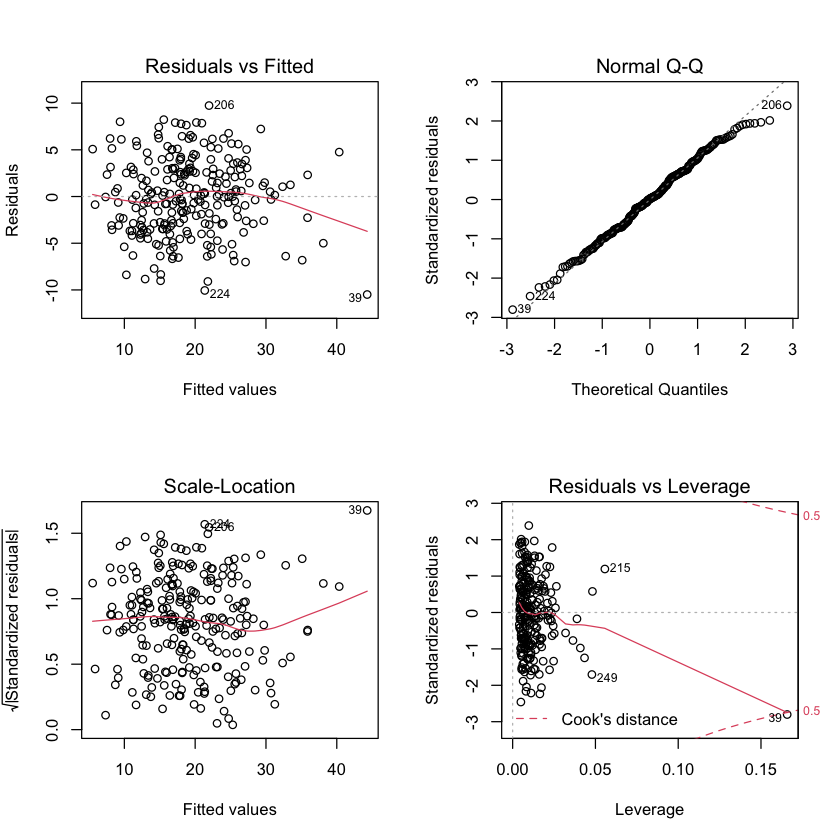

In [68]:
FinalModel=lm(BODYFAT ~ ABDOMEN + WEIGHT,        data=CleanData)
summary(FinalModel)
par(mfrow=c(2,2)) 
plot(FinalModel)

It seems that there is an obvious outliers 39 in our model, in fact when we plot our cooks distance:

Saving 7 x 7 in image



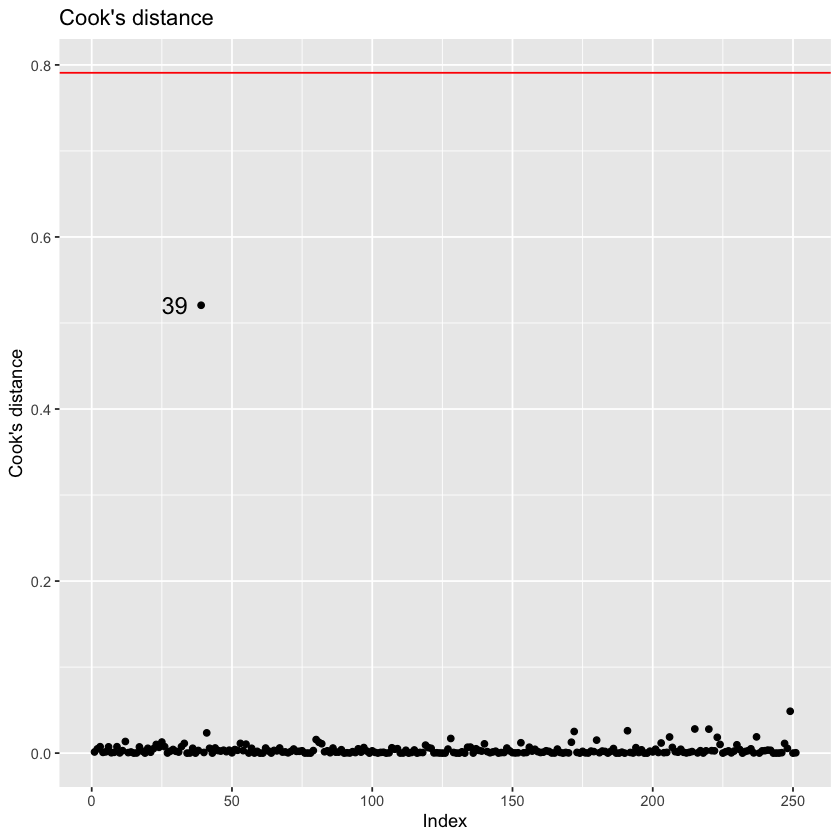

In [69]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
cooki=cooks.distance(FinalModel)
outliers=which(cooki>qf(0.5, p, n-p))
points39=which(cooki>0.5*qf(0.5, p, n-p))
g=ggplot()+
geom_point(aes(x=1:n, y=cooki))+
geom_text(aes(x=points39,y=cooki[points39],label=points39),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("Cook's distance")+
ggtitle("Cook's distance")+
geom_hline(yintercept =qf(0.5, p, n-p),color="red")
ggsave("Image/First_Model_Cooks_distance.jpeg",g)
g

As you can see, although 39 does not reach the threshold of Cook's distance, but it is too obvious, If you read the meanning of cooks distance in the following part, this point has great influence to our model, we try fix the model again without 39. 

In [70]:
CleanData2=WholeCleanData[WholeCleanData$IDNO!="39",]
CleanData2[35:46,]
dim(CleanData2)

IDNO BODYFAT DENSITY AGE WEIGHT HEIGHT  ADIPOSITY NECK CHEST ABDOMEN HIP  
35 35   31.1    1.0263  41  247.25 73.5000 32.2      42.1 117.0 115.6   116.1
36 36   38.2    1.0101  49  191.75 65.0000 32.0      38.4 118.5 113.1   113.8
37 37   23.6    1.0438  40  202.25 70.0000 29.1      38.5 106.5 100.9   106.2
38 38   27.5    1.0346  50  196.75 68.2500 29.7      42.1 105.6  98.8   104.8
40 40   31.3    1.0258  50  203.00 67.0000 31.8      40.2 114.8 108.1   102.5
41 41   33.1    1.0217  45  262.75 68.7500 39.1      43.2 128.3 126.2   125.6
42 42   31.7    1.0250  44  205.00 69.4255 29.9      36.6 106.0 104.3   115.5
43 43   30.4    1.0279  48  217.00 70.0000 31.2      37.3 113.3 111.2   114.1
44 44   30.8    1.0269  41  212.00 71.5000 29.2      41.5 106.6 104.3   106.0
45 45    8.4    1.0814  39  125.25 68.0000 19.1      31.5  85.1  76.0    88.2
46 46   14.1    1.0670  43  164.25 73.2500 21.3      35.7  96.6  81.5    97.2
47 47   11.2    1.0742  40  133.50 67.5000 20.6      33.6  88.2  73.7    88.5
   THIGH KNEE ANKLE BICEPS FOREARM WRIST
35 71.2  43.3 26.3  37.3   31.7    19.7 
36 61.9  38.3 21.9  32.0   29.8    17.0 
37 63.5  39.9 22.6  35.1   30.6    19.0 
38 66.0  41.5 24.7  33.2   30.5    19.4 
40 61.3  41.1 24.7  34.1   31.0    18.3 
41 72.5  39.6 26.6  36.4   32.7    21.4 
42 70.6  42.5 23.7  33.6   28.7    17.4 
43 67.7  40.9 25.0  36.7   29.8    18.4 
44 65.0  40.2 23.0  35.8   31.5    18.8 
45 50.0  34.7 21.0  26.1   23.1    16.1 
46 58.4  38.2 23.4  29.7   27.4    18.3 
47 53.3  34.5 22.5  27.9   26.2    17.3

[1] 250  17

The ID 39 is removed. 


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0915  -2.9213  -0.0889   2.9183   9.8806 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.26886    2.44647 -17.278  < 2e-16 ***
ABDOMEN       0.89944    0.05158  17.436  < 2e-16 ***
WEIGHT       -0.12270    0.01948  -6.297 1.37e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.041 on 247 degrees of freedom
Multiple R-squared:  0.7197,	Adjusted R-squared:  0.7174 
F-statistic:   317 on 2 and 247 DF,  p-value: < 2.2e-16


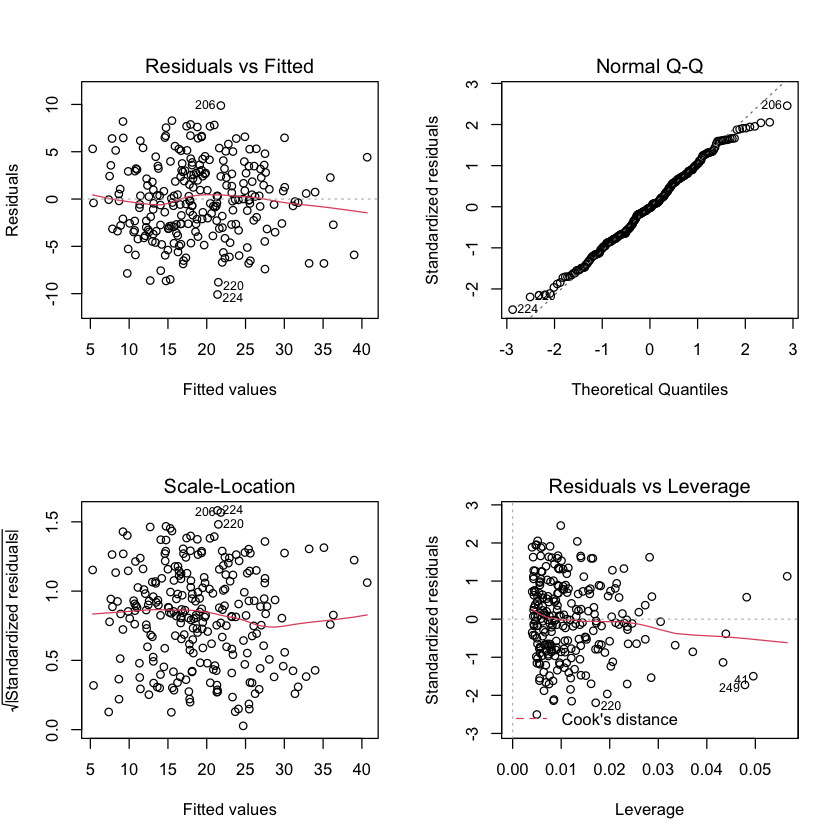

In [71]:
FinalModel2=lm(BODYFAT ~ ABDOMEN + WEIGHT,        data=CleanData2)
summary(FinalModel2)
par(mfrow=c(2,2)) 
plot(FinalModel2)

Model perform better in Rsquared and residual standard error, and there is great change in our intercept. As you can see in the cooks distance in the folloing, there is no obvious outliers.

Therefore we use this model as our final model. 

Summary of our model is bebind the diagnosis.

### Standardized Residuals

Standardized residuals:
$$r_i=\frac{e_i}{\sqrt{\hat{\sigma}^2(1-h_{ii})}}$$
where $e = y-\hat{y}$, $h_{ii}$ is diagonal elements from  $H=X(X'X)^{-1}X'$ and $\hat{\sigma}^2=\text{MSE}$.

Standardized residuals can compare residuals with the same scale. There is no rule of thumb for standardized residuals, the ith observation may be outliers if $r_i$ is large. Residual plots is also for test linearity and constant variance assumptions.

Saving 7 x 7 in image



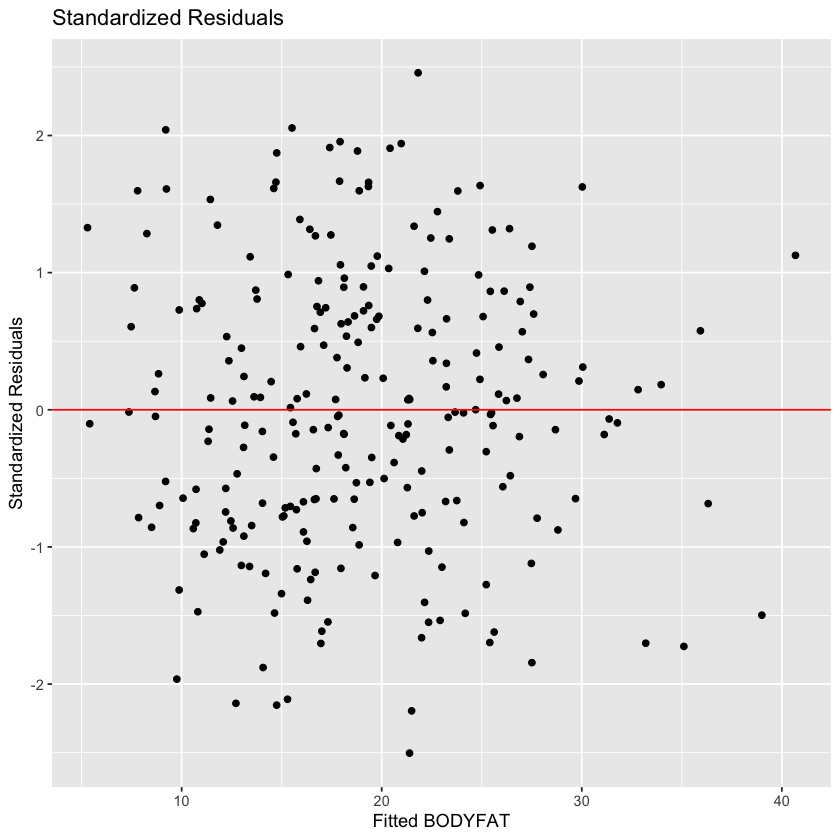

In [96]:

g=ggplot()+
geom_point(aes(x=predict(FinalModel2),rstandard(FinalModel2)))+
xlab("Fitted BODYFAT")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
geom_hline(yintercept = 0,color="red")
ggsave("Image/Final_Model_Standardized_Residuals.jpeg",g)
g

There is no obvious outliers from standardized residuals plots and there is no special pattern, except some slight  change in fitted bodyfat from 30 to 40, but it is not serious. Therefore we holds that linearity and constant variance assumptions hold.

### QQ plot for residual 

QQ plot is for test of normality assumption. 

pdf 
  2

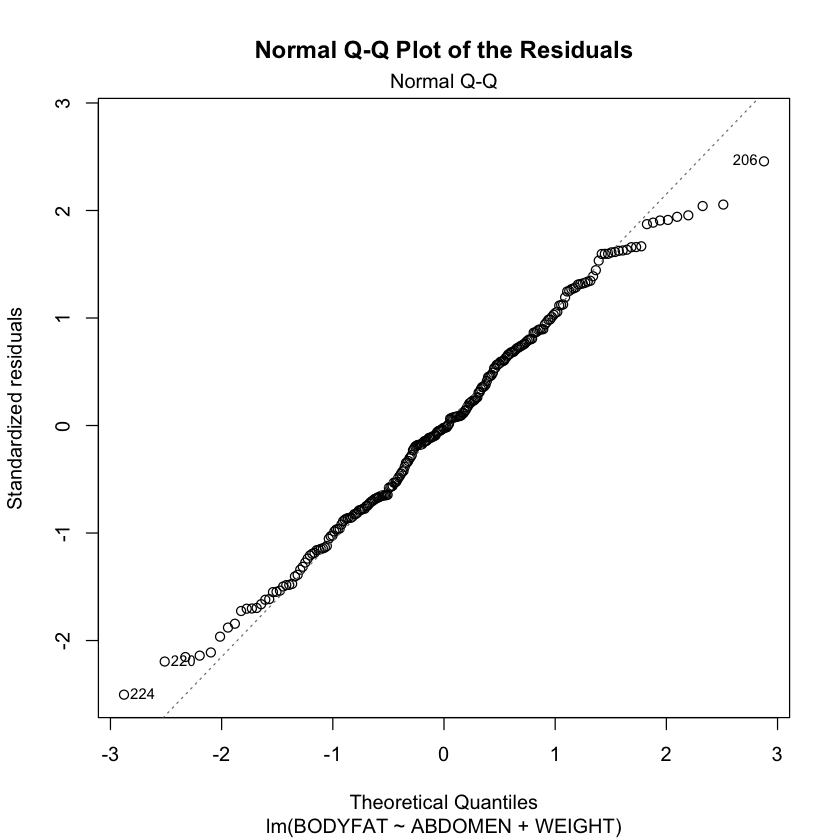

In [73]:
plot(FinalModel2, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="Image/Final_Model_QQPLOT.jpeg")
plot(FinalModel2, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

In [74]:
shapiro.test(rstandard(FinalModel2))


	Shapiro-Wilk normality test

data:  rstandard(FinalModel2)
W = 0.99235, p-value = 0.2227


The normality perform well in our model except some outliers, the same result can also be got from the Shapiro–Wilk test, which is a test of normality. p-value is larger than 0.05, we cannot reject the H0: the residual is normally distributed, we regard that the residual meets the normal distribution. Our model meets normality assumption. 

### Leverage Plots

The leverage $h_{ii}$ (diagonal elements from  $H=X(X'X)^{-1}X'$)  is a measure of the distance between $X_i$ and mean of $X$. The rule of thumb is that if $h_{ii}$ is larger than $2*p/n$. It will be a outlying in $X$. $p$ is number of variables in model including intercept. 

In [75]:
dim(model.matrix(FinalModel2))

[1] 250   3

Saving 7 x 7 in image



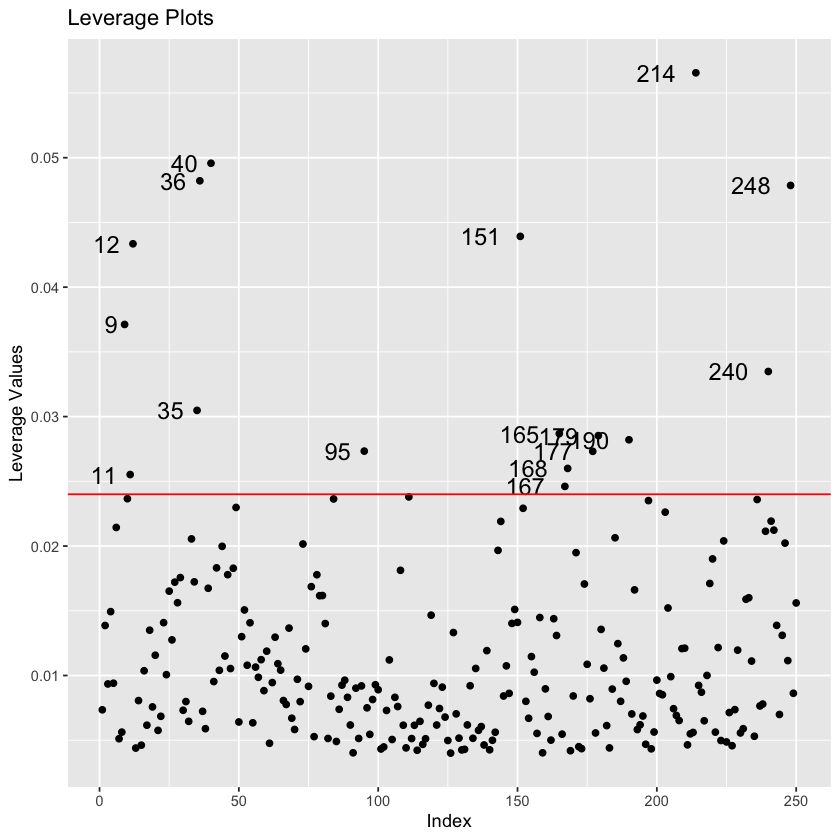

In [76]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
outliers=which(hatvalues(FinalModel2)>2*p/n)
g=ggplot()+
geom_point(aes(x=1:n, hatvalues(FinalModel2)))+
geom_text(aes(x=outliers,y=hatvalues(FinalModel2)[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("Leverage Values")+
ggtitle("Leverage Plots")+
geom_hline(yintercept =2*p/n,color="red")
ggsave("Image/Final_Model_Leverage_Plots.jpeg",g)
g

There is a lot of outliers from Leverage plots, which show the outliers when we choose WEIGHT and ABDOMEN as predictor.

### Cook's distance

$$D_i=\frac{\sum_{j=1}^n(\hat{y}_j-\hat{y}_{j(i)})^2}{p\hat{\sigma}^2}$$ is called Cook's distance, where $\hat{y}_{j(i)}$ are the prediction for point $j$ without observation $i$ included in regression.  which measure the influence of ith observation on all n fitted values. The rule of thumb is that if $D_i$ is larger than $F_{0.5}(p,n-p)$, we regard it as a outliers. 

Saving 7 x 7 in image



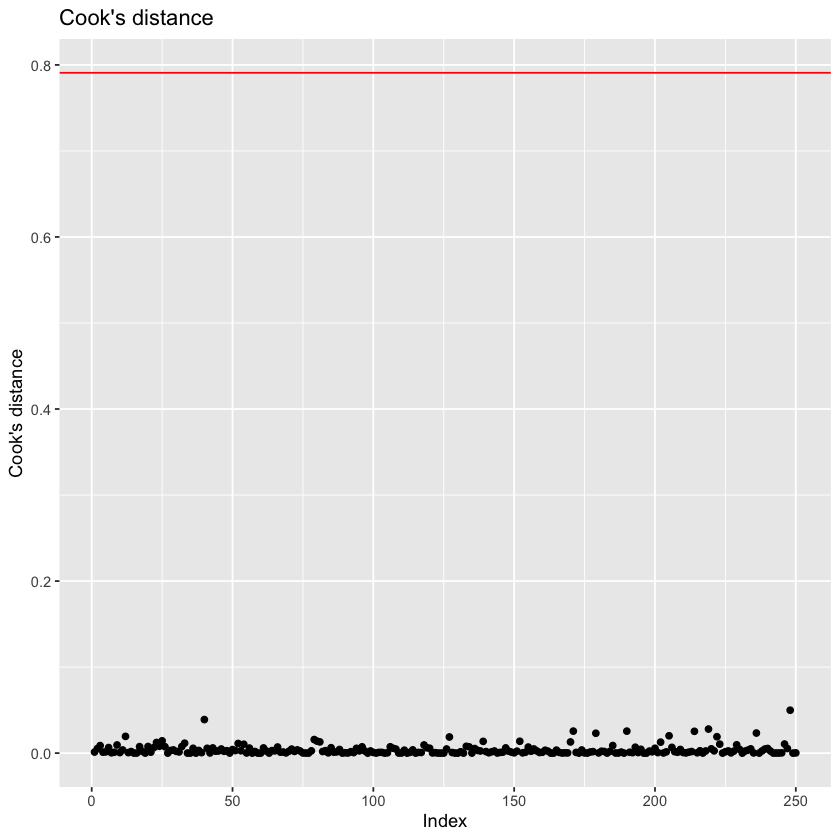

In [77]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
cooki=cooks.distance(FinalModel2)
outliers=which(cooki>qf(0.5, p, n-p))
g=ggplot()+
geom_point(aes(x=1:n, y=cooki))+
geom_text(aes(x=outliers,y=cooki[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("Cook's distance")+
ggtitle("Cook's distance")+
geom_hline(yintercept =qf(0.5, p, n-p),color="red")
ggsave("Image/Final_Model_Cooks_distance.jpeg",g)
g

No outliers from Cook's distance plot. ID 39 vanish.

### DFFITS

$$\text{DFFITS}_i = \frac{\hat{y}_i-\hat{y}_{i(i)}}{\hat{\sigma}_{(i)}\sqrt{h_{ii}}}$$ where $\hat{y}_{i(i)}$ are the prediction for point $i$ without observation $i$ included in regression. 

DFFITS measures the influence of the ith observation on the fitted value $\hat{y}_i$. The rule of thumb for small dataset is $abs(DFFITS)>1$, for large dataset is $abs(DFFITS)>2\sqrt{p/n}$

Saving 7 x 7 in image



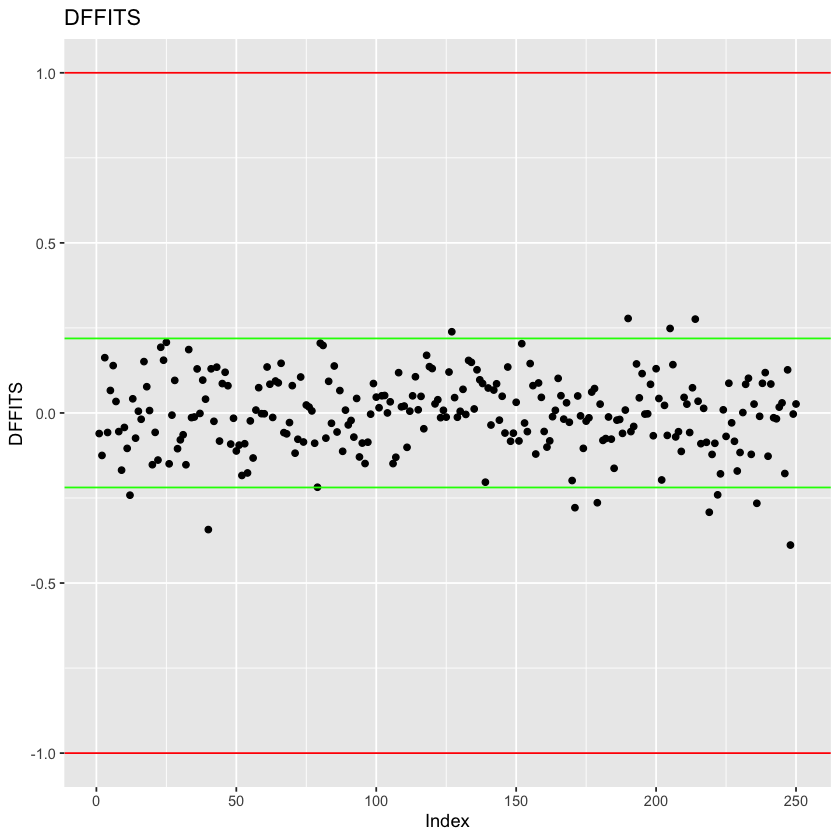

In [78]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
DFFITS=dffits(FinalModel2)
outliers=which(abs(DFFITS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFFITS))+
geom_text(aes(x=outliers,y=DFFITS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFFITS")+
ggtitle("DFFITS")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2*sqrt(p/n),color="green")+
geom_hline(yintercept =-2*sqrt(p/n),color="green")
ggsave("Image/Final_Model_DFFITS.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFFITS.

### DFBETAS

$$\text{DFBETAS}_{k(i)}=\frac{\hat{\beta}_k-\hat{\beta}_{k(i)}}{\sqrt{\hat{\sigma}^2_{(i)}(X^T X)^{-1}_{kk}}}$$ is DFBETAS, $\hat{\beta}_{k(i)}$ is the estimated kth parameters without i points.

The DFBETAS measures the influence of ith observation on the fit of the regression coefficient $\beta_k$. The rule of thumb for small dataset is $abs(DFBETAS)>1$, for large dataset is $abs(DFBETAS)>2/\sqrt{n}$

(Intercept) ABDOMEN      WEIGHT     
1 -0.02805738 -0.006627005  0.02554775
2 -0.09027445  0.104538676 -0.08476810
3  0.02507604  0.075469454 -0.11332695
4 -0.03273914  0.048616563 -0.04581739
5 -0.03699705  0.049252229 -0.03833762
6  0.02978862 -0.103202818  0.12498772

Saving 7 x 7 in image



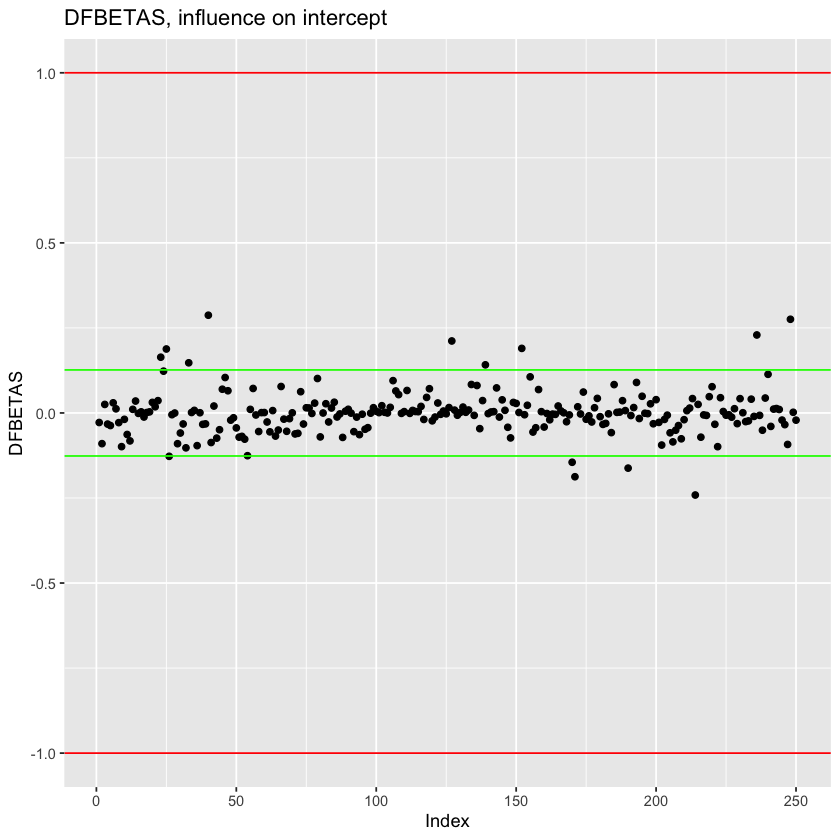

In [97]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
DFBETAS=dfbetas(FinalModel2)
head(DFBETAS)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,1]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on intercept")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_intercept.jpeg",g)
g

Saving 7 x 7 in image



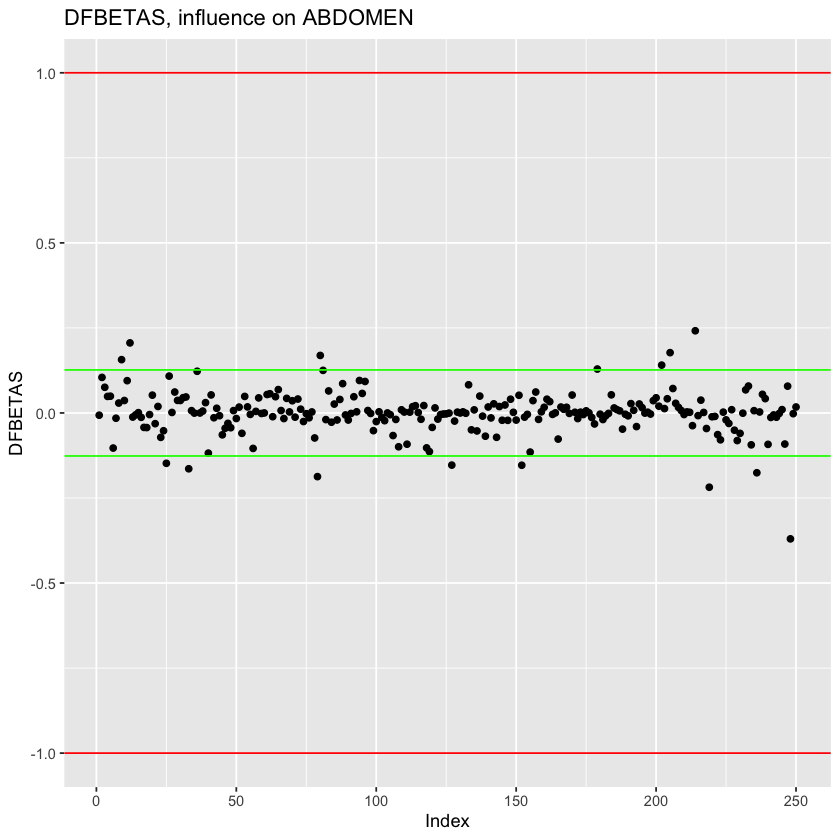

In [80]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
DFBETAS=dfbetas(FinalModel2)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,2]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on ABDOMEN")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_ABDOMEN.jpeg",g)
g

Saving 7 x 7 in image



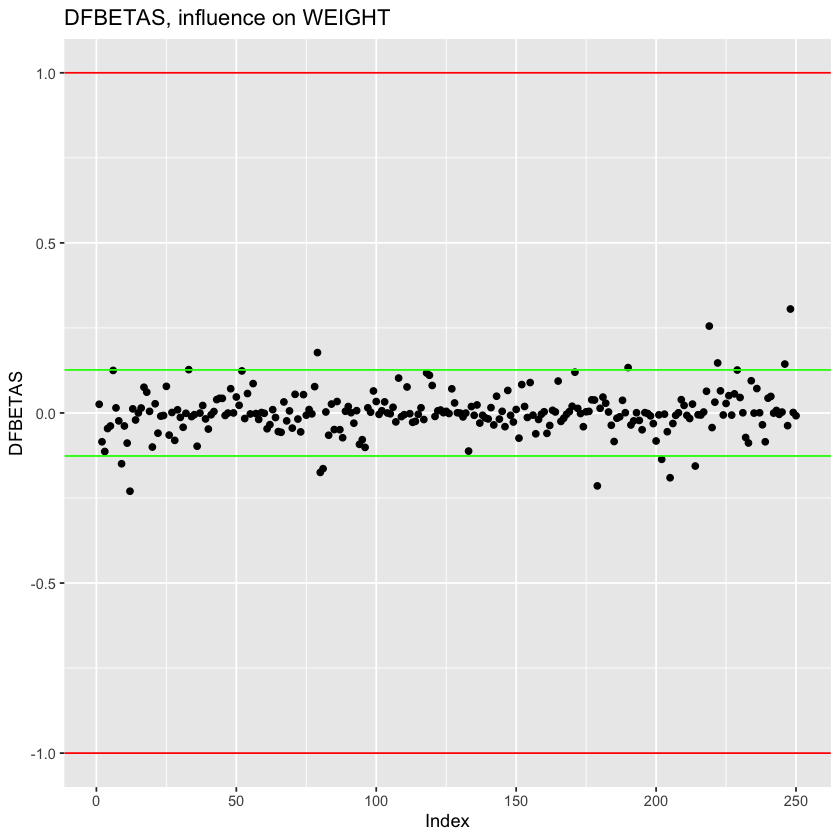

In [81]:
p=dim(model.matrix(FinalModel2))[2]
n=dim(model.matrix(FinalModel2))[1]
DFBETAS=dfbetas(FinalModel2)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,3]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on WEIGHT")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_WEIGHT.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFBETAS.

## Summary

In [82]:
summary(FinalModel2)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0915  -2.9213  -0.0889   2.9183   9.8806 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.26886    2.44647 -17.278  < 2e-16 ***
ABDOMEN       0.89944    0.05158  17.436  < 2e-16 ***
WEIGHT       -0.12270    0.01948  -6.297 1.37e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.041 on 247 degrees of freedom
Multiple R-squared:  0.7197,	Adjusted R-squared:  0.7174 
F-statistic:   317 on 2 and 247 DF,  p-value: < 2.2e-16


Our final model:

BODYFAT = 0.8994  ABDOMEN -0.1227  WEIGHT -42.2689

With test of H0: coefficient of WEIGHT (or ABDOMEN) is 0, H1: coefficient of WEIGHT (or ABDOMEN) is not 0

All p value is smaller than 0.05, means that we will reject H0: coefficient of WEIGHT (or ABDOMEN) is 0 at $\alpha=0.05$

All coefficients are significant, there are clear linear relationships between BODYFAT and the two variables. 

Rule of thumb is sum of 0.89944 times ABDOMEN, -0.1227  times WEIGHT and -42.2689, which will be the BODYFAT(%)

Example usage: for example, a person with 154.25 lbs WEIGHT, 85.2 cm ABDOMEN, his predicted BODYFAT will be about 15%, the 95% CI will be [7.45,23.42]. There is a 95% probability that his body fat is between 7.45% and 23.42%. 


In [83]:
predict(FinalModel2,newdata=data.frame(WEIGHT=154.25,ABDOMEN=85.2),interval="predict")

fit      lwr      upr     
1 15.43609 7.447418 23.42476

The residual standard error is 4.04 on 247 degrees of freedom, means that the prediction error in our dataset is about 4.04. This is not large.

The Rsquare is 0.72, our model can explain about 72% of variability in dataset. 

From our model we can see that:

by increasing one unit in ABDOMEN with other variables hold, BODYFAT will increase 0.8994%, 

by increasing one unit in WEIGHT with other variables hold, BODYFAT will decrease 0.1227%, 

And the 95% CI for coefficient is:

In [84]:
confint(FinalModel2)

2.5 %      97.5 %      
(Intercept) -47.087457 -37.45026268
ABDOMEN       0.797834   1.00103793
WEIGHT       -0.161081  -0.08432574

Which means that we are 95% confident that the interval above contains the true coefficients.


## Further interpretation of our model

In our model, when ABDOMEN increase with WEIGHT holds, the BODYFAT will increase, which meets our common sense. A man with large  abdomen circumference will have large body fat percentage. 

But why when WEIGHT increase with ABDOMEN holds, the BODYFAT will decrease? Which drive us to think that, when WEIGHT increase, BODYFAT may not increase, because the weight of other body part may also increase, such as some NBA players has extreme high weight but low body fat percentage.

Therefore, our model tells us a very important information, when your body fat increase, large part of body fat will accumulate in your abdomen, so it is a wrong way to judge health by weight only. Even you have large weight, you may also need to refer to abdomen circumference to find whether it is too large in your weight. But when you abdomen circumference is very large but your weight is not large enough to prove that you are a huge, strong person like NBA players, you may have a very high body fat percentage. 

In [101]:
vif = car::vif(FinalModel2) 
mean(vif) 
vif

[1] 4.164733

ABDOMEN   WEIGHT 
4.164733 4.164733

There is no obvious multicollinearity 


### Strength and Weakness of Model

Our model enjoys good R square and small sum of residual. The linearity, normality and constant variance assumptions hold. The model explain more than 70% of variation in body fat with only 2 inputs. It is simple.

But our model sacrifice Rsquare and residual error to make our model simple, therefore our model may not be precise as model with more variables. Its Rsquare is not perfect. On the other hand, we expect more detailed data which can improve our model R squared and standard error. 